In [5]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
from matplotlib.ticker import FuncFormatter

In [6]:
def assegna_seed(df, osservazioni_per_seed=50):
    seed_list = []
    seed = 0
    for i in range(len(df)):
        if i % osservazioni_per_seed == 0 and i != 0:
            seed += 1
        seed_list.append(seed)
    df['seed'] = seed_list
    return df

def carica_e_processa_dataframe(percorso):
    df = pd.read_csv(percorso)
    df = assegna_seed(df)
    df = df.dropna()
    df = df[df['Ricompensa Totale'] != np.inf]  
    df['Ricompensa Totale'] = df['Ricompensa Totale'].astype(int)
    df = df[df['Ricompensa Totale'] < 30000]
    df = df[df['Ricompensa Totale'] > -30000]
    df['Percentuale di Richieste Rifiutate'] = df['Percentuale di Richieste Rifiutate'].apply(lambda x: round(x, 2))
    return df

In [7]:
def calcola_statistiche(df, nome_colonna='Ricompensa Totale'):
    medie_per_seed = df.groupby('seed')[nome_colonna].mean()
    dev_standard_medie = medie_per_seed.std()
    media_generale = medie_per_seed.mean()
    coeff_var = (dev_standard_medie / media_generale) * 100
    
    return dev_standard_medie, coeff_var

# NEAT

## STANDARD

### Scenario 1

In [8]:
percorso_s1s1 = 'C:/Users/giaco/Desktop/Esperimenti/NON-TUNED/NEAT/Scenario 1/S1vsS1.csv'
percorso_s1s2 = 'C:/Users/giaco/Desktop/Esperimenti/NON-TUNED/NEAT/Scenario 1/S1vsS2.csv'
percorso_s1s3 = 'C:/Users/giaco/Desktop/Esperimenti/NON-TUNED/NEAT/Scenario 1/S1vsS3.csv'

n_s_s1s1 = carica_e_processa_dataframe(percorso_s1s1)
n_s_s1s2 = carica_e_processa_dataframe(percorso_s1s2)
n_s_s1s3 = carica_e_processa_dataframe(percorso_s1s3)

dataframes = [n_s_s1s1, n_s_s1s2, n_s_s1s3]

for df in dataframes:
    dev_standard_medie, coeff_var = calcola_statistiche(df)
    print("Deviazione Standard tra le Medie dei Seed in:", dev_standard_medie)
    print("Coefficiente di Variazione:", coeff_var)
    print("--------------------------------------------------------")

Deviazione Standard tra le Medie dei Seed in: 951.9280857576595
Coefficiente di Variazione: 9.783544003087409
--------------------------------------------------------
Deviazione Standard tra le Medie dei Seed in: 17724.596565442997
Coefficiente di Variazione: -195.053840221115
--------------------------------------------------------
Deviazione Standard tra le Medie dei Seed in: 15282.551586899497
Coefficiente di Variazione: -341.76512629773185
--------------------------------------------------------


S1 vs S1

In [9]:
print(f"Ricompensa media per episodio: {n_s_s1s1['Ricompensa Totale'].mean()}")
print(f"Media delle richieste rifiutate per episodio: {n_s_s1s1['Richieste Rifiutate'].mean()}")
print(f"Media del n di steps in congestione per episodio: {n_s_s1s1['Steps in Congestione'].mean()}")
print(f"Media della % di requests rifiutate per episodio: {n_s_s1s1['Percentuale di Richieste Rifiutate'].mean()}")


Ricompensa media per episodio: 9819.48401826484
Media delle richieste rifiutate per episodio: 1931.3196347031962
Media del n di steps in congestione per episodio: 0.9497716894977168
Media della % di requests rifiutate per episodio: 19.405753424657536


S1 vs S2

In [10]:
print(f"Ricompensa media per episodio: {n_s_s1s2['Ricompensa Totale'].mean()}")
print(f"Media delle richieste rifiutate per episodio: {n_s_s1s2['Richieste Rifiutate'].mean()}")
print(f"Media del n di steps in congestione per episodio: {n_s_s1s2['Steps in Congestione'].mean()}")
print(f"Media della % di requests rifiutate per episodio: {n_s_s1s2['Percentuale di Richieste Rifiutate'].mean()}")

Ricompensa media per episodio: 744.4868421052631
Media delle richieste rifiutate per episodio: 3641.25
Media del n di steps in congestione per episodio: 17.539473684210527
Media della % di requests rifiutate per episodio: 36.600789473684216


S1 vs S3

In [11]:
print(f"Ricompensa media per episodio: {n_s_s1s3['Ricompensa Totale'].mean()}")
print(f"Media delle richieste rifiutate per episodio: {n_s_s1s3['Richieste Rifiutate'].mean()}")
print(f"Media del n di steps in congestione per episodio: {n_s_s1s3['Steps in Congestione'].mean()}")
print(f"Media della % di requests rifiutate per episodio: {n_s_s1s3['Percentuale di Richieste Rifiutate'].mean()}")

Ricompensa media per episodio: -6052.1325301204815
Media delle richieste rifiutate per episodio: 2822.897590361446
Media del n di steps in congestione per episodio: 12.69277108433735
Media della % di requests rifiutate per episodio: 28.366746987951807


### Scenario 2

In [12]:
percorso_s2s1 = 'C:/Users/giaco/Desktop/Esperimenti/NON-TUNED/NEAT/Scenario 2/S2vsS1.csv'
percorso_s2s2 = 'C:/Users/giaco/Desktop/Esperimenti/NON-TUNED/NEAT/Scenario 2/S2vsS2.csv'
percorso_s2s3 = 'C:/Users/giaco/Desktop/Esperimenti/NON-TUNED/NEAT/Scenario 2/S2vsS3.csv'

n_s_s2s1 = carica_e_processa_dataframe(percorso_s2s1)
n_s_s2s2 = carica_e_processa_dataframe(percorso_s2s2)
n_s_s2s3 = carica_e_processa_dataframe(percorso_s2s3)

dataframes = [n_s_s2s1, n_s_s2s2, n_s_s2s3]

for df in dataframes:
    dev_standard_medie, coeff_var = calcola_statistiche(df)
    print("Deviazione Standard tra le Medie dei Seed in:", dev_standard_medie)
    print("Coefficiente di Variazione:", coeff_var)
    print("--------------------------------------------------------")

Deviazione Standard tra le Medie dei Seed in: 5412.325770798447
Coefficiente di Variazione: -2276.7754738700382
--------------------------------------------------------
Deviazione Standard tra le Medie dei Seed in: 2395.539907593001
Coefficiente di Variazione: -99.6819114366698
--------------------------------------------------------
Deviazione Standard tra le Medie dei Seed in: 2358.333790872182
Coefficiente di Variazione: 106.80852839698582
--------------------------------------------------------


S2 vs S1

In [13]:
print(f"Ricompensa media per episodio: {n_s_s2s1['Ricompensa Totale'].mean()}")
print(f"Media delle richieste rifiutate per episodio: {n_s_s2s1['Richieste Rifiutate'].mean()}")
print(f"Media del n di steps in congestione per episodio: {n_s_s2s1['Steps in Congestione'].mean()}")
print(f"Media della % di requests rifiutate per episodio: {n_s_s2s1['Percentuale di Richieste Rifiutate'].mean()}")

Ricompensa media per episodio: -490.0214592274678
Media delle richieste rifiutate per episodio: 3441.9356223175964
Media del n di steps in congestione per episodio: 23.386266094420602
Media della % di requests rifiutate per episodio: 34.62888412017167


S2 vs S2

In [14]:
print(f"Ricompensa media per episodio: {n_s_s2s2['Ricompensa Totale'].mean()}")
print(f"Media delle richieste rifiutate per episodio: {n_s_s2s2['Richieste Rifiutate'].mean()}")
print(f"Media del n di steps in congestione per episodio: {n_s_s2s2['Steps in Congestione'].mean()}")
print(f"Media della % di requests rifiutate per episodio: {n_s_s2s2['Percentuale di Richieste Rifiutate'].mean()}")

Ricompensa media per episodio: -2481.4935064935066
Media delle richieste rifiutate per episodio: 3662.787878787879
Media del n di steps in congestione per episodio: 25.974025974025974
Media della % di requests rifiutate per episodio: 36.80965367965369


S2 vs S3

In [15]:
print(f"Ricompensa media per episodio: {n_s_s2s3['Ricompensa Totale'].mean()}")
print(f"Media delle richieste rifiutate per episodio: {n_s_s2s3['Richieste Rifiutate'].mean()}")
print(f"Media del n di steps in congestione per episodio: {n_s_s2s3['Steps in Congestione'].mean()}")
print(f"Media della % di requests rifiutate per episodio: {n_s_s2s3['Percentuale di Richieste Rifiutate'].mean()}")

Ricompensa media per episodio: 2016.0128755364806
Media delle richieste rifiutate per episodio: 3603.5150214592277
Media del n di steps in congestione per episodio: 21.476394849785407
Media della % di requests rifiutate per episodio: 36.21270386266095


### Scenario 3

In [16]:
percorso_s3s1 = 'C:/Users/giaco/Desktop/Esperimenti/NON-TUNED/NEAT/Scenario 3/S3vsS1.csv'
percorso_s3s2 = 'C:/Users/giaco/Desktop/Esperimenti/NON-TUNED/NEAT/Scenario 3/S3vsS2.csv'
percorso_s3s3 = 'C:/Users/giaco/Desktop/Esperimenti/NON-TUNED/NEAT/Scenario 3/S3vsS3.csv'

n_s_s3s1 = carica_e_processa_dataframe(percorso_s3s1)
n_s_s3s2 = carica_e_processa_dataframe(percorso_s3s2)
n_s_s3s3 = carica_e_processa_dataframe(percorso_s3s3)

dataframes = [n_s_s3s1, n_s_s3s2, n_s_s3s3]

for df in dataframes:
    dev_standard_medie, coeff_var = calcola_statistiche(df)
    print("Deviazione Standard tra le Medie dei Seed in:", dev_standard_medie)
    print("Coefficiente di Variazione:", coeff_var)
    print("--------------------------------------------------------")

Deviazione Standard tra le Medie dei Seed in: 752.851966413938
Coefficiente di Variazione: -2.5944458284179435
--------------------------------------------------------
Deviazione Standard tra le Medie dei Seed in: nan
Coefficiente di Variazione: nan
--------------------------------------------------------
Deviazione Standard tra le Medie dei Seed in: 3472.348277982517
Coefficiente di Variazione: 30.60728755213691
--------------------------------------------------------


S3 vs S1

In [17]:
print(f"Ricompensa media per episodio: {n_s_s3s1['Ricompensa Totale'].mean()}")
print(f"Media delle richieste rifiutate per episodio: {n_s_s3s1['Richieste Rifiutate'].mean()}")
print(f"Media del n di steps in congestione per episodio: {n_s_s3s1['Steps in Congestione'].mean()}")
print(f"Media della % di requests rifiutate per episodio: {n_s_s3s1['Percentuale di Richieste Rifiutate'].mean()}")

Ricompensa media per episodio: -28840.25
Media delle richieste rifiutate per episodio: 0.0
Media del n di steps in congestione per episodio: 36.25
Media della % di requests rifiutate per episodio: 0.0


S3 vs S2

In [18]:
print(f"Ricompensa media per episodio: {n_s_s3s2['Ricompensa Totale'].mean()}")
print(f"Media delle richieste rifiutate per episodio: {n_s_s3s2['Richieste Rifiutate'].mean()}")
print(f"Media del n di steps in congestione per episodio: {n_s_s3s2['Steps in Congestione'].mean()}")
print(f"Media della % di requests rifiutate per episodio: {n_s_s3s2['Percentuale di Richieste Rifiutate'].mean()}")

Ricompensa media per episodio: -29339.0
Media delle richieste rifiutate per episodio: 0.0
Media del n di steps in congestione per episodio: 45.0
Media della % di requests rifiutate per episodio: 0.0


S3 vs S3

In [19]:
print(f"Ricompensa media per episodio: {n_s_s3s3['Ricompensa Totale'].mean()}")
print(f"Media delle richieste rifiutate per episodio: {n_s_s3s3['Richieste Rifiutate'].mean()}")
print(f"Media del n di steps in congestione per episodio: {n_s_s3s3['Steps in Congestione'].mean()}")
print(f"Media della % di requests rifiutate per episodio: {n_s_s3s3['Percentuale di Richieste Rifiutate'].mean()}")

Ricompensa media per episodio: 11345.504166666668
Media delle richieste rifiutate per episodio: 3.754166666666667
Media del n di steps in congestione per episodio: 1.2791666666666666
Media della % di requests rifiutate per episodio: 0.037541666666666675


## TUNED

### Scenario 1

In [20]:
percorso_s1s1 = 'C:/Users/giaco/Desktop/Esperimenti/TUNED/NEAT/Scenario 1/S1vsS1.csv'
percorso_s1s2 = 'C:/Users/giaco/Desktop/Esperimenti/TUNED/NEAT/Scenario 1/S1vsS2.csv'
percorso_s1s3 = 'C:/Users/giaco/Desktop/Esperimenti/TUNED/NEAT/Scenario 1/S1vsS3.csv'

n_t_s1s1 = carica_e_processa_dataframe(percorso_s1s1)
n_t_s1s2 = carica_e_processa_dataframe(percorso_s1s2)
n_t_s1s3 = carica_e_processa_dataframe(percorso_s1s3)

dataframes = [n_t_s1s1, n_t_s1s2, n_t_s1s3]

for df in dataframes:
    dev_standard_medie, coeff_var = calcola_statistiche(df)
    print("Deviazione Standard tra le Medie dei Seed in:", dev_standard_medie)
    print("Coefficiente di Variazione:", coeff_var)
    print("--------------------------------------------------------")

Deviazione Standard tra le Medie dei Seed in: 2859.805009154117
Coefficiente di Variazione: 32.915805786107306
--------------------------------------------------------
Deviazione Standard tra le Medie dei Seed in: nan
Coefficiente di Variazione: nan
--------------------------------------------------------
Deviazione Standard tra le Medie dei Seed in: 25563.247389452674
Coefficiente di Variazione: -244.7513611690304
--------------------------------------------------------


In [21]:
print(f"Ricompensa media per episodio: {n_t_s1s1['Ricompensa Totale'].mean()}")
print(f"Media delle richieste rifiutate per episodio: {n_t_s1s1['Richieste Rifiutate'].mean()}")
print(f"Media del n di steps in congestione per episodio: {n_t_s1s1['Steps in Congestione'].mean()}")
print(f"Media della % di requests rifiutate per episodio: {n_t_s1s1['Percentuale di Richieste Rifiutate'].mean()}")

Ricompensa media per episodio: 8655.720207253886
Media delle richieste rifiutate per episodio: 1011.979274611399
Media del n di steps in congestione per episodio: 2.7875647668393784
Media della % di requests rifiutate per episodio: 10.177098445595854


In [22]:
print(f"Ricompensa media per episodio: {n_t_s1s2['Ricompensa Totale'].mean()}")
print(f"Media delle richieste rifiutate per episodio: {n_t_s1s2['Richieste Rifiutate'].mean()}")
print(f"Media del n di steps in congestione per episodio: {n_t_s1s2['Steps in Congestione'].mean()}")
print(f"Media della % di requests rifiutate per episodio: {n_t_s1s2['Percentuale di Richieste Rifiutate'].mean()}")

Ricompensa media per episodio: -27391.0
Media delle richieste rifiutate per episodio: 1408.9333333333334
Media del n di steps in congestione per episodio: 34.31111111111111
Media della % di requests rifiutate per episodio: 14.15177777777778


In [23]:
print(f"Ricompensa media per episodio: {n_t_s1s3['Ricompensa Totale'].mean()}")
print(f"Media delle richieste rifiutate per episodio: {n_t_s1s3['Richieste Rifiutate'].mean()}")
print(f"Media del n di steps in congestione per episodio: {n_t_s1s3['Steps in Congestione'].mean()}")
print(f"Media della % di requests rifiutate per episodio: {n_t_s1s3['Percentuale di Richieste Rifiutate'].mean()}")

Ricompensa media per episodio: -3214.2
Media delle richieste rifiutate per episodio: 1326.1714285714286
Media del n di steps in congestione per episodio: 7.928571428571429
Media della % di requests rifiutate per episodio: 13.327


### Scenario 2

In [24]:
percorso_s2s1 = 'C:/Users/giaco/Desktop/Esperimenti/TUNED/NEAT/Scenario 2/S2vsS1.csv'
percorso_s2s2 = 'C:/Users/giaco/Desktop/Esperimenti/TUNED/NEAT/Scenario 2/S2vsS2.csv'
percorso_s2s3 = 'C:/Users/giaco/Desktop/Esperimenti/TUNED/NEAT/Scenario 2/S2vsS3.csv'

n_t_s2s1 = carica_e_processa_dataframe(percorso_s2s1)
n_t_s2s2 = carica_e_processa_dataframe(percorso_s2s2)
n_t_s2s3 = carica_e_processa_dataframe(percorso_s2s3)

dataframes = [n_t_s2s1, n_t_s2s2, n_t_s2s3]

for df in dataframes:
    dev_standard_medie, coeff_var = calcola_statistiche(df)
    print("Deviazione Standard tra le Medie dei Seed in:", dev_standard_medie)
    print("Coefficiente di Variazione:", coeff_var)
    print("--------------------------------------------------------")

Deviazione Standard tra le Medie dei Seed in: 2852.297456561273
Coefficiente di Variazione: 44.168586239967986
--------------------------------------------------------
Deviazione Standard tra le Medie dei Seed in: 3172.285662827914
Coefficiente di Variazione: 595.968870879263
--------------------------------------------------------
Deviazione Standard tra le Medie dei Seed in: 2020.0899262462715
Coefficiente di Variazione: 41.284711360846664
--------------------------------------------------------


In [25]:
print(f"Ricompensa media per episodio: {n_t_s2s1['Ricompensa Totale'].mean()}")
print(f"Media delle richieste rifiutate per episodio: {n_t_s2s1['Richieste Rifiutate'].mean()}")
print(f"Media del n di steps in congestione per episodio: {n_t_s2s1['Steps in Congestione'].mean()}")
print(f"Media della % di requests rifiutate per episodio: {n_t_s2s1['Percentuale di Richieste Rifiutate'].mean()}")

Ricompensa media per episodio: 6582.734939759036
Media delle richieste rifiutate per episodio: 3473.7710843373493
Media del n di steps in congestione per episodio: 5.457831325301205
Media della % di requests rifiutate per episodio: 34.9094578313253


In [26]:
print(f"Ricompensa media per episodio: {n_t_s2s2['Ricompensa Totale'].mean()}")
print(f"Media delle richieste rifiutate per episodio: {n_t_s2s2['Richieste Rifiutate'].mean()}")
print(f"Media del n di steps in congestione per episodio: {n_t_s2s2['Steps in Congestione'].mean()}")
print(f"Media della % di requests rifiutate per episodio: {n_t_s2s2['Percentuale di Richieste Rifiutate'].mean()}")

Ricompensa media per episodio: 503.8301886792453
Media delle richieste rifiutate per episodio: 3890.9685534591194
Media del n di steps in congestione per episodio: 13.30817610062893
Media della % di requests rifiutate per episodio: 39.09817610062893


In [27]:
print(f"Ricompensa media per episodio: {n_t_s2s3['Ricompensa Totale'].mean()}")
print(f"Media delle richieste rifiutate per episodio: {n_t_s2s3['Richieste Rifiutate'].mean()}")
print(f"Media del n di steps in congestione per episodio: {n_t_s2s3['Steps in Congestione'].mean()}")
print(f"Media della % di requests rifiutate per episodio: {n_t_s2s3['Percentuale di Richieste Rifiutate'].mean()}")

Ricompensa media per episodio: 4802.554054054054
Media delle richieste rifiutate per episodio: 3649.8445945945946
Media del n di steps in congestione per episodio: 8.22972972972973
Media della % di requests rifiutate per episodio: 36.67804054054054


### Scenario 3

In [28]:
percorso_s3s1 = 'C:/Users/giaco/Desktop/Esperimenti/TUNED/NEAT/Scenario 3/S3vsS1.csv'
percorso_s3s2 = 'C:/Users/giaco/Desktop/Esperimenti/TUNED/NEAT/Scenario 3/S3vsS2.csv'
percorso_s3s3 = 'C:/Users/giaco/Desktop/Esperimenti/TUNED/NEAT/Scenario 3/S3vsS3.csv'

n_t_s3s1 = carica_e_processa_dataframe(percorso_s3s1)
n_t_s3s2 = carica_e_processa_dataframe(percorso_s3s2)
n_t_s3s3 = carica_e_processa_dataframe(percorso_s3s3)

dataframes = [n_t_s3s1, n_t_s3s2, n_t_s3s3]

for df in dataframes:
    dev_standard_medie, coeff_var = calcola_statistiche(df)
    print("Deviazione Standard tra le Medie dei Seed in:", dev_standard_medie)
    print("Coefficiente di Variazione:", coeff_var)
    print("--------------------------------------------------------")

Deviazione Standard tra le Medie dei Seed in: nan
Coefficiente di Variazione: nan
--------------------------------------------------------
Deviazione Standard tra le Medie dei Seed in: nan
Coefficiente di Variazione: nan
--------------------------------------------------------
Deviazione Standard tra le Medie dei Seed in: 5374.871981076075
Coefficiente di Variazione: 54.37336131458284
--------------------------------------------------------


In [29]:
print(f"Ricompensa media per episodio: {n_t_s3s1['Ricompensa Totale'].mean()}")
print(f"Media delle richieste rifiutate per episodio: {n_t_s3s1['Richieste Rifiutate'].mean()}")
print(f"Media del n di steps in congestione per episodio: {n_t_s3s1['Steps in Congestione'].mean()}")
print(f"Media della % di requests rifiutate per episodio: {n_t_s3s1['Percentuale di Richieste Rifiutate'].mean()}")

Ricompensa media per episodio: nan
Media delle richieste rifiutate per episodio: nan
Media del n di steps in congestione per episodio: nan
Media della % di requests rifiutate per episodio: nan


In [30]:
print(f"Ricompensa media per episodio: {n_t_s3s2['Ricompensa Totale'].mean()}")
print(f"Media delle richieste rifiutate per episodio: {n_t_s3s2['Richieste Rifiutate'].mean()}")
print(f"Media del n di steps in congestione per episodio: {n_t_s3s2['Steps in Congestione'].mean()}")
print(f"Media della % di requests rifiutate per episodio: {n_t_s3s2['Percentuale di Richieste Rifiutate'].mean()}")

Ricompensa media per episodio: -9543.16
Media delle richieste rifiutate per episodio: 0.0
Media del n di steps in congestione per episodio: 20.18
Media della % di requests rifiutate per episodio: 0.0


In [31]:
print(f"Ricompensa media per episodio: {n_t_s3s3['Ricompensa Totale'].mean()}")
print(f"Media delle richieste rifiutate per episodio: {n_t_s3s3['Richieste Rifiutate'].mean()}")
print(f"Media del n di steps in congestione per episodio: {n_t_s3s3['Steps in Congestione'].mean()}")
print(f"Media della % di requests rifiutate per episodio: {n_t_s3s3['Percentuale di Richieste Rifiutate'].mean()}")

Ricompensa media per episodio: 9855.96335078534
Media delle richieste rifiutate per episodio: 10.366492146596858
Media del n di steps in congestione per episodio: 2.356020942408377
Media della % di requests rifiutate per episodio: 0.10366492146596859


# PPO

## TUNED

### Scenario 1

In [32]:
percorso_s1s1 = 'C:/Users/giaco/Desktop/Esperimenti/TUNED/PPO/Scenario 1/S1vsS1.csv'
percorso_s1s2 = 'C:/Users/giaco/Desktop/Esperimenti/TUNED/PPO/Scenario 1/S1vsS2.csv'
percorso_s1s3 = 'C:/Users/giaco/Desktop/Esperimenti/TUNED/PPO/Scenario 1/S1vsS3.csv'

p_t_s1s1 = carica_e_processa_dataframe(percorso_s1s1)
p_t_s1s2 = carica_e_processa_dataframe(percorso_s1s2)
p_t_s1s3 = carica_e_processa_dataframe(percorso_s1s3)

dataframes_3 = [p_t_s1s1, p_t_s1s2, p_t_s1s3]

for df in dataframes_3:
    dev_standard_medie, coeff_var = calcola_statistiche(df)
    print("Deviazione Standard tra le Medie dei Seed in:", dev_standard_medie)
    print("Coefficiente di Variazione:", coeff_var)
    print("--------------------------------------------------------")

Deviazione Standard tra le Medie dei Seed in: 1971.693241132266
Coefficiente di Variazione: 15.619330813578294
--------------------------------------------------------
Deviazione Standard tra le Medie dei Seed in: 4908.483865797434
Coefficiente di Variazione: -49.71873703925848
--------------------------------------------------------
Deviazione Standard tra le Medie dei Seed in: 2067.078581265616
Coefficiente di Variazione: 19.098122285844838
--------------------------------------------------------


In [33]:
print(f"Ricompensa media per episodio: {p_t_s1s1['Ricompensa Totale'].mean()}")
print(f"Media delle richieste rifiutate per episodio: {p_t_s1s1['Richieste Rifiutate'].mean()}")
print(f"Media del n di steps in congestione per episodio: {p_t_s1s1['Steps in Congestione'].mean()}")
print(f"Media della % di requests rifiutate per episodio: {p_t_s1s1['Percentuale di Richieste Rifiutate'].mean()}")

Ricompensa media per episodio: 12662.780612244898
Media delle richieste rifiutate per episodio: 1045.0255102040817
Media del n di steps in congestione per episodio: 0.3826530612244898
Media della % di requests rifiutate per episodio: 10.483214285714286


In [34]:
print(f"Ricompensa media per episodio: {p_t_s1s2['Ricompensa Totale'].mean()}")
print(f"Media delle richieste rifiutate per episodio: {p_t_s1s2['Richieste Rifiutate'].mean()}")
print(f"Media del n di steps in congestione per episodio: {p_t_s1s2['Steps in Congestione'].mean()}")
print(f"Media della % di requests rifiutate per episodio: {p_t_s1s2['Percentuale di Richieste Rifiutate'].mean()}")

Ricompensa media per episodio: -9830.25
Media delle richieste rifiutate per episodio: 1358.9642857142858
Media del n di steps in congestione per episodio: 20.066326530612244
Media della % di requests rifiutate per episodio: 13.65265306122449


In [35]:
print(f"Ricompensa media per episodio: {p_t_s1s3['Ricompensa Totale'].mean()}")
print(f"Media delle richieste rifiutate per episodio: {p_t_s1s3['Richieste Rifiutate'].mean()}")
print(f"Media del n di steps in congestione per episodio: {p_t_s1s3['Steps in Congestione'].mean()}")
print(f"Media della % di requests rifiutate per episodio: {p_t_s1s3['Percentuale di Richieste Rifiutate'].mean()}")

Ricompensa media per episodio: 10779.79381443299
Media delle richieste rifiutate per episodio: 1267.8917525773195
Media del n di steps in congestione per episodio: 1.4175257731958764
Media della % di requests rifiutate per episodio: 12.740876288659793


### Scenario 2

In [36]:
# Caricamento e processamento dei DataFrame per il secondo gruppo
percorso_s2s1 = 'C:/Users/giaco/Desktop/Esperimenti/TUNED/PPO/Scenario 2/S2vsS1.csv'
percorso_s2s2 = 'C:/Users/giaco/Desktop/Esperimenti/TUNED/PPO/Scenario 2/S2vsS2.csv'
percorso_s2s3 = 'C:/Users/giaco/Desktop/Esperimenti/TUNED/PPO/Scenario 2/S2vsS3.csv'

p_t_s2s1 = carica_e_processa_dataframe(percorso_s2s1)
p_t_s2s2 = carica_e_processa_dataframe(percorso_s2s2)
p_t_s2s3 = carica_e_processa_dataframe(percorso_s2s3)

dataframes_2 = [p_t_s2s1, p_t_s2s2, p_t_s2s3]

for df in dataframes_2:
    dev_standard_medie, coeff_var = calcola_statistiche(df)
    print("Deviazione Standard tra le Medie dei Seed in:", dev_standard_medie)
    print("Coefficiente di Variazione:", coeff_var)
    print("--------------------------------------------------------")

Deviazione Standard tra le Medie dei Seed in: 4656.644349942281
Coefficiente di Variazione: 73.65161641025527
--------------------------------------------------------
Deviazione Standard tra le Medie dei Seed in: 1913.9589218667231
Coefficiente di Variazione: 46.00480571531177
--------------------------------------------------------
Deviazione Standard tra le Medie dei Seed in: 1147.889879996384
Coefficiente di Variazione: 8.612012926117094
--------------------------------------------------------


In [37]:
print(f"Ricompensa media per episodio: {p_t_s2s1['Ricompensa Totale'].mean()}")
print(f"Media delle richieste rifiutate per episodio: {p_t_s2s1['Richieste Rifiutate'].mean()}")
print(f"Media del n di steps in congestione per episodio: {p_t_s2s1['Steps in Congestione'].mean()}")
print(f"Media della % di requests rifiutate per episodio: {p_t_s2s1['Percentuale di Richieste Rifiutate'].mean()}")

Ricompensa media per episodio: 6290.559585492228
Media delle richieste rifiutate per episodio: 547.1243523316062
Media del n di steps in congestione per episodio: 4.27979274611399
Media della % di requests rifiutate per episodio: 5.504715025906735


In [38]:
print(f"Ricompensa media per episodio: {p_t_s2s2['Ricompensa Totale'].mean()}")
print(f"Media delle richieste rifiutate per episodio: {p_t_s2s2['Richieste Rifiutate'].mean()}")
print(f"Media del n di steps in congestione per episodio: {p_t_s2s2['Steps in Congestione'].mean()}")
print(f"Media della % di requests rifiutate per episodio: {p_t_s2s2['Percentuale di Richieste Rifiutate'].mean()}")

Ricompensa media per episodio: 4141.515151515152
Media delle richieste rifiutate per episodio: 456.57070707070704
Media del n di steps in congestione per episodio: 7.171717171717172
Media della % di requests rifiutate per episodio: 4.58979797979798


In [39]:
print(f"Ricompensa media per episodio: {p_t_s2s3['Ricompensa Totale'].mean()}")
print(f"Media delle richieste rifiutate per episodio: {p_t_s2s3['Richieste Rifiutate'].mean()}")
print(f"Media del n di steps in congestione per episodio: {p_t_s2s3['Steps in Congestione'].mean()}")
print(f"Media della % di requests rifiutate per episodio: {p_t_s2s3['Percentuale di Richieste Rifiutate'].mean()}")

Ricompensa media per episodio: 13350.721649484536
Media delle richieste rifiutate per episodio: 337.5979381443299
Media del n di steps in congestione per episodio: 0.04639175257731959
Media della % di requests rifiutate per episodio: 3.394072164948453


### Scenario 3

In [40]:
# Caricamento e processamento dei DataFrame per il terzo gruppo
percorso_s3s1 = 'C:/Users/giaco/Desktop/Esperimenti/TUNED/PPO/Scenario 3/S3vsS1.csv'
percorso_s3s2 = 'C:/Users/giaco/Desktop/Esperimenti/TUNED/PPO/Scenario 3/S3vsS2.csv'
percorso_s3s3 = 'C:/Users/giaco/Desktop/Esperimenti/TUNED/PPO/Scenario 3/S3vsS3.csv'

p_t_s3s1 = carica_e_processa_dataframe(percorso_s3s1)
p_t_s3s2 = carica_e_processa_dataframe(percorso_s3s2)
p_t_s3s3 = carica_e_processa_dataframe(percorso_s3s3)

dataframes_3 = [p_t_s3s1, p_t_s3s2, p_t_s3s3]

for df in dataframes_3:
    dev_standard_medie, coeff_var = calcola_statistiche(df)
    print("Deviazione Standard tra le Medie dei Seed in:", dev_standard_medie)
    print("Coefficiente di Variazione:", coeff_var)
    print("--------------------------------------------------------")

Deviazione Standard tra le Medie dei Seed in: 4696.4614181804845
Coefficiente di Variazione: -412.2989051185584
--------------------------------------------------------
Deviazione Standard tra le Medie dei Seed in: 9181.353767715887
Coefficiente di Variazione: -129.87723920781926
--------------------------------------------------------
Deviazione Standard tra le Medie dei Seed in: 3675.8259493875603
Coefficiente di Variazione: 26.59830802294615
--------------------------------------------------------


In [41]:
print(f"Ricompensa media per episodio: {p_t_s3s1['Ricompensa Totale'].mean()}")
print(f"Media delle richieste rifiutate per episodio: {p_t_s3s1['Richieste Rifiutate'].mean()}")
print(f"Media del n di steps in congestione per episodio: {p_t_s3s1['Steps in Congestione'].mean()}")
print(f"Media della % di requests rifiutate per episodio: {p_t_s3s1['Percentuale di Richieste Rifiutate'].mean()}")

Ricompensa media per episodio: -1173.6712328767123
Media delle richieste rifiutate per episodio: 73.77397260273973
Media del n di steps in congestione per episodio: 11.520547945205479
Media della % di requests rifiutate per episodio: 0.741986301369863


In [42]:
print(f"Ricompensa media per episodio: {p_t_s3s2['Ricompensa Totale'].mean()}")
print(f"Media delle richieste rifiutate per episodio: {p_t_s3s2['Richieste Rifiutate'].mean()}")
print(f"Media del n di steps in congestione per episodio: {p_t_s3s2['Steps in Congestione'].mean()}")
print(f"Media della % di requests rifiutate per episodio: {p_t_s3s2['Percentuale di Richieste Rifiutate'].mean()}")

Ricompensa media per episodio: -6948.69191919192
Media delle richieste rifiutate per episodio: 95.63636363636364
Media del n di steps in congestione per episodio: 18.651515151515152
Media della % di requests rifiutate per episodio: 0.9606565656565655


In [43]:
print(f"Ricompensa media per episodio: {p_t_s3s3['Ricompensa Totale'].mean()}")
print(f"Media delle richieste rifiutate per episodio: {p_t_s3s3['Richieste Rifiutate'].mean()}")
print(f"Media del n di steps in congestione per episodio: {p_t_s3s3['Steps in Congestione'].mean()}")
print(f"Media della % di requests rifiutate per episodio: {p_t_s3s3['Percentuale di Richieste Rifiutate'].mean()}")

Ricompensa media per episodio: 13806.641025641025
Media delle richieste rifiutate per episodio: 95.59487179487179
Media del n di steps in congestione per episodio: 0.717948717948718
Media della % di requests rifiutate per episodio: 0.9606666666666666


## STANDARD

### Scenario 1

In [44]:
percorso_s1s1 = 'C:/Users/giaco/Desktop/Esperimenti/NON-TUNED/PPO/Scenario 1/S1vsS1.csv'
percorso_s1s2 = 'C:/Users/giaco/Desktop/Esperimenti/NON-TUNED/PPO/Scenario 1/S1vsS2.csv'
percorso_s1s3 = 'C:/Users/giaco/Desktop/Esperimenti/NON-TUNED/PPO/Scenario 1/S1vsS3.csv'

p_s_s1s1 = carica_e_processa_dataframe(percorso_s1s1)
p_s_s1s2 = carica_e_processa_dataframe(percorso_s1s2)
p_s_s1s3 = carica_e_processa_dataframe(percorso_s1s3)

dataframes = [p_s_s1s1, p_s_s1s2, p_s_s1s3] 

for df in dataframes:
    dev_standard_medie, coeff_var = calcola_statistiche(df)
    
    print("Deviazione Standard tra le Medie dei Seed in:", dev_standard_medie)
    print("Coefficiente di Variazione:", coeff_var)
    print("--------------------------------------------------------")

Deviazione Standard tra le Medie dei Seed in: 629.9705317542516
Coefficiente di Variazione: 4.159295384761923
--------------------------------------------------------
Deviazione Standard tra le Medie dei Seed in: 3468.6883930290364
Coefficiente di Variazione: -44.26658787586807
--------------------------------------------------------
Deviazione Standard tra le Medie dei Seed in: 569.4983968917131
Coefficiente di Variazione: 3.6769603077306923
--------------------------------------------------------


In [45]:
print(f"Ricompensa media per episodio: {p_s_s1s1['Ricompensa Totale'].mean()}")
print(f"Media delle richieste rifiutate per episodio: {p_s_s1s1['Richieste Rifiutate'].mean()}")
print(f"Media del n di steps in congestione per episodio: {p_s_s1s1['Steps in Congestione'].mean()}")
print(f"Media della % di requests rifiutate per episodio: {p_s_s1s1['Percentuale di Richieste Rifiutate'].mean()}")

Ricompensa media per episodio: 15151.177685950413
Media delle richieste rifiutate per episodio: 144.59504132231405
Media del n di steps in congestione per episodio: 0.7479338842975206
Media della % di requests rifiutate per episodio: 1.4501652892561985


In [46]:
print(f"Ricompensa media per episodio: {p_s_s1s2['Ricompensa Totale'].mean()}")
print(f"Media delle richieste rifiutate per episodio: {p_s_s1s2['Richieste Rifiutate'].mean()}")
print(f"Media del n di steps in congestione per episodio: {p_s_s1s2['Steps in Congestione'].mean()}")
print(f"Media della % di requests rifiutate per episodio: {p_s_s1s2['Percentuale di Richieste Rifiutate'].mean()}")

Ricompensa media per episodio: -7833.25
Media delle richieste rifiutate per episodio: 99.18032786885246
Media del n di steps in congestione per episodio: 21.360655737704917
Media della % di requests rifiutate per episodio: 0.9961885245901638


In [47]:
print(f"Ricompensa media per episodio: {p_s_s1s3['Ricompensa Totale'].mean()}")
print(f"Media delle richieste rifiutate per episodio: {p_s_s1s3['Richieste Rifiutate'].mean()}")
print(f"Media del n di steps in congestione per episodio: {p_s_s1s3['Steps in Congestione'].mean()}")
print(f"Media della % di requests rifiutate per episodio: {p_s_s1s3['Percentuale di Richieste Rifiutate'].mean()}")

Ricompensa media per episodio: 15481.432098765432
Media delle richieste rifiutate per episodio: 67.08641975308642
Media del n di steps in congestione per episodio: 0.24691358024691357
Media della % di requests rifiutate per episodio: 0.672962962962963


### Scenario 2

In [48]:
percorso_s2s1 = 'C:/Users/giaco/Desktop/Esperimenti/NON-TUNED/PPO/Scenario 2/S2vsS1.csv'
percorso_s2s2 = 'C:/Users/giaco/Desktop/Esperimenti/NON-TUNED/PPO/Scenario 2/S2vsS2.csv'
percorso_s2s3 = 'C:/Users/giaco/Desktop/Esperimenti/NON-TUNED/PPO/Scenario 2/S2vsS3.csv'

p_s_s2s1 = carica_e_processa_dataframe(percorso_s2s1)
p_s_s2s2 = carica_e_processa_dataframe(percorso_s2s2)
p_s_s2s3 = carica_e_processa_dataframe(percorso_s2s3)

dataframes = [p_s_s2s1, p_s_s2s2, p_s_s2s3] 

for df in dataframes:
    dev_standard_medie, coeff_var = calcola_statistiche(df)
    
    print("Deviazione Standard tra le Medie dei Seed in:", dev_standard_medie)
    print("Coefficiente di Variazione:", coeff_var)
    print("--------------------------------------------------------")

Deviazione Standard tra le Medie dei Seed in: 2303.870988672255
Coefficiente di Variazione: 22.808585564173164
--------------------------------------------------------
Deviazione Standard tra le Medie dei Seed in: 1342.9165550356204
Coefficiente di Variazione: 20.947626476979288
--------------------------------------------------------
Deviazione Standard tra le Medie dei Seed in: 1787.2215255319402
Coefficiente di Variazione: 13.541171362224969
--------------------------------------------------------


In [49]:
print(f"Ricompensa media per episodio: {p_s_s2s1['Ricompensa Totale'].mean()}")
print(f"Media delle richieste rifiutate per episodio: {p_s_s2s1['Richieste Rifiutate'].mean()}")
print(f"Media del n di steps in congestione per episodio: {p_s_s2s1['Steps in Congestione'].mean()}")
print(f"Media della % di requests rifiutate per episodio: {p_s_s2s1['Percentuale di Richieste Rifiutate'].mean()}")

Ricompensa media per episodio: 10102.267206477733
Media delle richieste rifiutate per episodio: 713.0769230769231
Media del n di steps in congestione per episodio: 1.5222672064777327
Media della % di requests rifiutate per episodio: 7.155991902834007


In [50]:
print(f"Ricompensa media per episodio: {p_s_s2s2['Ricompensa Totale'].mean()}")
print(f"Media delle richieste rifiutate per episodio: {p_s_s2s2['Richieste Rifiutate'].mean()}")
print(f"Media del n di steps in congestione per episodio: {p_s_s2s2['Steps in Congestione'].mean()}")
print(f"Media della % di requests rifiutate per episodio: {p_s_s2s2['Percentuale di Richieste Rifiutate'].mean()}")

Ricompensa media per episodio: 6417.19028340081
Media delle richieste rifiutate per episodio: 938.3805668016195
Media del n di steps in congestione per episodio: 5.854251012145749
Media della % di requests rifiutate per episodio: 9.430566801619433


In [51]:
print(f"Ricompensa media per episodio: {p_s_s2s3['Ricompensa Totale'].mean()}")
print(f"Media delle richieste rifiutate per episodio: {p_s_s2s3['Richieste Rifiutate'].mean()}")
print(f"Media del n di steps in congestione per episodio: {p_s_s2s3['Steps in Congestione'].mean()}")
print(f"Media della % di requests rifiutate per episodio: {p_s_s2s3['Percentuale di Richieste Rifiutate'].mean()}")

Ricompensa media per episodio: 13215.065040650406
Media delle richieste rifiutate per episodio: 661.670731707317
Media del n di steps in congestione per episodio: 0.11788617886178862
Media della % di requests rifiutate per episodio: 6.649390243902438


### Scenario 3

In [52]:
# Definizione dei percorsi
percorso_s3s1 = 'C:/Users/giaco/Desktop/Esperimenti/NON-TUNED/PPO/Scenario 3/S3vsS1.csv'
percorso_s3s2 = 'C:/Users/giaco/Desktop/Esperimenti/NON-TUNED/PPO/Scenario 3/S3vsS2.csv'
percorso_s3s3 = 'C:/Users/giaco/Desktop/Esperimenti/NON-TUNED/PPO/Scenario 3/S3vsS3.csv'

# Caricamento e processamento dei DataFrame
p_s_s3s1 = carica_e_processa_dataframe(percorso_s3s1)
p_s_s3s2 = carica_e_processa_dataframe(percorso_s3s2)
p_s_s3s3 = carica_e_processa_dataframe(percorso_s3s3)

# Lista dei nuovi DataFrame
nuovi_dataframes = [p_s_s3s1, p_s_s3s2, p_s_s3s3] 

# Calcolo delle statistiche per ogni nuovo DataFrame
for df in nuovi_dataframes:
    dev_standard_medie, coeff_var = calcola_statistiche(df)
    
    print("Deviazione Standard tra le Medie dei Seed in:", dev_standard_medie)
    print("Coefficiente di Variazione:", coeff_var)
    print("--------------------------------------------------------")

Deviazione Standard tra le Medie dei Seed in: 8913.67955178436
Coefficiente di Variazione: 555.2786171193981
--------------------------------------------------------
Deviazione Standard tra le Medie dei Seed in: 5442.285635008639
Coefficiente di Variazione: -658.9782506279122
--------------------------------------------------------
Deviazione Standard tra le Medie dei Seed in: 1274.4853759532928
Coefficiente di Variazione: 7.715724950263317
--------------------------------------------------------


In [55]:
print(f"Ricompensa media per episodio: {p_s_s3s1['Ricompensa Totale'].mean()}")
print(f"Media delle richieste rifiutate per episodio: {p_s_s3s1['Richieste Rifiutate'].mean()}")
print(f"Media del n di steps in congestione per episodio: {p_s_s3s1['Steps in Congestione'].mean()}")
print(f"Media della % di requests rifiutate per episodio: {p_s_s3s1['Percentuale di Richieste Rifiutate'].mean()}")

Ricompensa media per episodio: 1614.0823045267489
Media delle richieste rifiutate per episodio: 71.21810699588477
Media del n di steps in congestione per episodio: 11.246913580246913
Media della % di requests rifiutate per episodio: 0.7144855967078192


In [56]:
print(f"Ricompensa media per episodio: {p_s_s3s2['Ricompensa Totale'].mean()}")
print(f"Media delle richieste rifiutate per episodio: {p_s_s3s2['Richieste Rifiutate'].mean()}")
print(f"Media del n di steps in congestione per episodio: {p_s_s3s2['Steps in Congestione'].mean()}")
print(f"Media della % di requests rifiutate per episodio: {p_s_s3s2['Percentuale di Richieste Rifiutate'].mean()}")

Ricompensa media per episodio: -869.698347107438
Media delle richieste rifiutate per episodio: 71.24793388429752
Media del n di steps in congestione per episodio: 14.557851239669422
Media della % di requests rifiutate per episodio: 0.7151652892561983


In [57]:
print(f"Ricompensa media per episodio: {p_s_s3s3['Ricompensa Totale'].mean()}")
print(f"Media delle richieste rifiutate per episodio: {p_s_s3s3['Richieste Rifiutate'].mean()}")
print(f"Media del n di steps in congestione per episodio: {p_s_s3s3['Steps in Congestione'].mean()}")
print(f"Media della % di requests rifiutate per episodio: {p_s_s3s3['Percentuale di Richieste Rifiutate'].mean()}")

Ricompensa media per episodio: 16520.82857142857
Media delle richieste rifiutate per episodio: 64.53877551020408
Media del n di steps in congestione per episodio: 0.12244897959183673
Media della % di requests rifiutate per episodio: 0.6462040816326531


# SAC

## TUNED

### Scenario 1

In [58]:
percorso_s1s1 = 'C:/Users/giaco/Desktop/Esperimenti/TUNED/SAC/Scenario 1/S1vsS1.csv'
percorso_s1s2 = 'C:/Users/giaco/Desktop/Esperimenti/TUNED/SAC/Scenario 1/S1vsS2.csv'
percorso_s1s3 = 'C:/Users/giaco/Desktop/Esperimenti/TUNED/SAC/Scenario 1/S1vsS3.csv'

s_t_s1s1 = carica_e_processa_dataframe(percorso_s1s1)
s_t_s1s2 = carica_e_processa_dataframe(percorso_s1s2)
s_t_s1s3 = carica_e_processa_dataframe(percorso_s1s3)

dataframes = [s_t_s1s1, s_t_s1s2, s_t_s1s3]

for df in dataframes:
    dev_standard_medie, coeff_var = calcola_statistiche(df)
    print("Deviazione Standard tra le Medie dei Seed in:", dev_standard_medie)
    print("Coefficiente di Variazione:", coeff_var)
    print("--------------------------------------------------------")

Deviazione Standard tra le Medie dei Seed in: 1612.326423126376
Coefficiente di Variazione: 19.193068672476628
--------------------------------------------------------
Deviazione Standard tra le Medie dei Seed in: 1617.8603153548204
Coefficiente di Variazione: 34.66747515114867
--------------------------------------------------------
Deviazione Standard tra le Medie dei Seed in: 1865.2787458589466
Coefficiente di Variazione: 17.327431701130646
--------------------------------------------------------


In [59]:
print(f"Ricompensa media per episodio: {s_t_s1s1['Ricompensa Totale'].mean()}")
print(f"Media delle richieste rifiutate per episodio: {s_t_s1s1['Richieste Rifiutate'].mean()}")
print(f"Media del n di steps in congestione per episodio: {s_t_s1s1['Steps in Congestione'].mean()}")
print(f"Media della % di requests rifiutate per episodio: {s_t_s1s1['Percentuale di Richieste Rifiutate'].mean()}")

Ricompensa media per episodio: 8412.319587628866
Media delle richieste rifiutate per episodio: 1121.340206185567
Media del n di steps in congestione per episodio: 1.7525773195876289
Media della % di requests rifiutate per episodio: 11.247422680412368


In [60]:
print(f"Ricompensa media per episodio: {s_t_s1s2['Ricompensa Totale'].mean()}")
print(f"Media delle richieste rifiutate per episodio: {s_t_s1s2['Richieste Rifiutate'].mean()}")
print(f"Media del n di steps in congestione per episodio: {s_t_s1s2['Steps in Congestione'].mean()}")
print(f"Media della % di requests rifiutate per episodio: {s_t_s1s2['Percentuale di Richieste Rifiutate'].mean()}")

Ricompensa media per episodio: 4666.7959183673465
Media delle richieste rifiutate per episodio: 1473.2448979591836
Media del n di steps in congestione per episodio: 10.948979591836734
Media della % di requests rifiutate per episodio: 14.816122448979595


In [61]:
print(f"Ricompensa media per episodio: {s_t_s1s3['Ricompensa Totale'].mean()}")
print(f"Media delle richieste rifiutate per episodio: {s_t_s1s3['Richieste Rifiutate'].mean()}")
print(f"Media del n di steps in congestione per episodio: {s_t_s1s3['Steps in Congestione'].mean()}")
print(f"Media della % di requests rifiutate per episodio: {s_t_s1s3['Percentuale di Richieste Rifiutate'].mean()}")

Ricompensa media per episodio: 10791.80612244898
Media delle richieste rifiutate per episodio: 872.2857142857143
Media del n di steps in congestione per episodio: 1.1020408163265305
Media della % di requests rifiutate per episodio: 8.765714285714285


### Scenario 2

In [62]:
percorso_s2s1 = 'C:/Users/giaco/Desktop/Esperimenti/TUNED/SAC/Scenario 2/S2vsS1.csv'
percorso_s2s2 = 'C:/Users/giaco/Desktop/Esperimenti/TUNED/SAC/Scenario 2/S2vsS2.csv'
percorso_s2s3 = 'C:/Users/giaco/Desktop/Esperimenti/TUNED/SAC/Scenario 2/S2vsS3.csv'

s_t_s2s1 = carica_e_processa_dataframe(percorso_s2s1)
s_t_s2s2 = carica_e_processa_dataframe(percorso_s2s2)
s_t_s2s3 = carica_e_processa_dataframe(percorso_s2s3)

dataframes = [s_t_s2s1, s_t_s2s2, s_t_s2s3]

for df in dataframes:
    dev_standard_medie, coeff_var = calcola_statistiche(df)
    print("Deviazione Standard tra le Medie dei Seed in:", dev_standard_medie)
    print("Coefficiente di Variazione:", coeff_var)
    print("--------------------------------------------------------")

Deviazione Standard tra le Medie dei Seed in: 2521.054733724703
Coefficiente di Variazione: 38.506051007311015
--------------------------------------------------------
Deviazione Standard tra le Medie dei Seed in: 4837.075268412552
Coefficiente di Variazione: 262.0827909250667
--------------------------------------------------------
Deviazione Standard tra le Medie dei Seed in: nan
Coefficiente di Variazione: nan
--------------------------------------------------------


In [63]:
print(f"Ricompensa media per episodio: {s_t_s2s1['Ricompensa Totale'].mean()}")
print(f"Media delle richieste rifiutate per episodio: {s_t_s2s1['Richieste Rifiutate'].mean()}")
print(f"Media del n di steps in congestione per episodio: {s_t_s2s1['Steps in Congestione'].mean()}")
print(f"Media della % di requests rifiutate per episodio: {s_t_s2s1['Percentuale di Richieste Rifiutate'].mean()}")

Ricompensa media per episodio: 6565.171717171717
Media delle richieste rifiutate per episodio: 1567.919191919192
Media del n di steps in congestione per episodio: 5.333333333333333
Media della % di requests rifiutate per episodio: 15.782626262626263


In [64]:
print(f"Ricompensa media per episodio: {s_t_s2s2['Ricompensa Totale'].mean()}")
print(f"Media delle richieste rifiutate per episodio: {s_t_s2s2['Richieste Rifiutate'].mean()}")
print(f"Media del n di steps in congestione per episodio: {s_t_s2s2['Steps in Congestione'].mean()}")
print(f"Media della % di requests rifiutate per episodio: {s_t_s2s2['Percentuale di Richieste Rifiutate'].mean()}")

Ricompensa media per episodio: 1739.8453608247423
Media delle richieste rifiutate per episodio: 2282.319587628866
Media del n di steps in congestione per episodio: 17.927835051546392
Media della % di requests rifiutate per episodio: 22.9279381443299


In [65]:
print(f"Ricompensa media per episodio: {s_t_s2s3['Ricompensa Totale'].mean()}")
print(f"Media delle richieste rifiutate per episodio: {s_t_s2s3['Richieste Rifiutate'].mean()}")
print(f"Media del n di steps in congestione per episodio: {s_t_s2s3['Steps in Congestione'].mean()}")
print(f"Media della % di requests rifiutate per episodio: {s_t_s2s3['Percentuale di Richieste Rifiutate'].mean()}")

Ricompensa media per episodio: 4805.065217391304
Media delle richieste rifiutate per episodio: 2207.1521739130435
Media del n di steps in congestione per episodio: 11.021739130434783
Media della % di requests rifiutate per episodio: 22.179347826086957


### Scenario 3

In [66]:
percorso_s3s1 = 'C:/Users/giaco/Desktop/Esperimenti/TUNED/SAC/Scenario 3/S3vsS1.csv'
percorso_s3s2 = 'C:/Users/giaco/Desktop/Esperimenti/TUNED/SAC/Scenario 3/S3vsS2.csv'
percorso_s3s3 = 'C:/Users/giaco/Desktop/Esperimenti/TUNED/SAC/Scenario 3/S3vsS3.csv'

s_t_s3s1 = carica_e_processa_dataframe(percorso_s3s1)
s_t_s3s2 = carica_e_processa_dataframe(percorso_s3s2)
s_t_s3s3 = carica_e_processa_dataframe(percorso_s3s3)

dataframes = [s_t_s3s1, s_t_s3s2, s_t_s3s3]

for df in dataframes:
    dev_standard_medie, coeff_var = calcola_statistiche(df)
    print("Deviazione Standard tra le Medie dei Seed in:", dev_standard_medie)
    print("Coefficiente di Variazione:", coeff_var)
    print("--------------------------------------------------------")

Deviazione Standard tra le Medie dei Seed in: nan
Coefficiente di Variazione: nan
--------------------------------------------------------
Deviazione Standard tra le Medie dei Seed in: 788.5743212140027
Coefficiente di Variazione: -18.497212543118284
--------------------------------------------------------
Deviazione Standard tra le Medie dei Seed in: 577.1222878792788
Coefficiente di Variazione: 5.297972439896148
--------------------------------------------------------


In [67]:
print(f"Ricompensa media per episodio: {s_t_s3s1['Ricompensa Totale'].mean()}")
print(f"Media delle richieste rifiutate per episodio: {s_t_s3s1['Richieste Rifiutate'].mean()}")
print(f"Media del n di steps in congestione per episodio: {s_t_s3s1['Steps in Congestione'].mean()}")
print(f"Media della % di requests rifiutate per episodio: {s_t_s3s1['Percentuale di Richieste Rifiutate'].mean()}")

Ricompensa media per episodio: 7357.591836734694
Media delle richieste rifiutate per episodio: 920.204081632653
Media del n di steps in congestione per episodio: 6.122448979591836
Media della % di requests rifiutate per episodio: 9.227551020408162


In [68]:
print(f"Ricompensa media per episodio: {s_t_s3s2['Ricompensa Totale'].mean()}")
print(f"Media delle richieste rifiutate per episodio: {s_t_s3s2['Richieste Rifiutate'].mean()}")
print(f"Media del n di steps in congestione per episodio: {s_t_s3s2['Steps in Congestione'].mean()}")
print(f"Media della % di requests rifiutate per episodio: {s_t_s3s2['Percentuale di Richieste Rifiutate'].mean()}")

Ricompensa media per episodio: -4251.826530612245
Media delle richieste rifiutate per episodio: 1558.3061224489795
Media del n di steps in congestione per episodio: 19.70408163265306
Media della % di requests rifiutate per episodio: 15.665510204081633


In [69]:
print(f"Ricompensa media per episodio: {s_t_s3s3['Ricompensa Totale'].mean()}")
print(f"Media delle richieste rifiutate per episodio: {s_t_s3s3['Richieste Rifiutate'].mean()}")
print(f"Media del n di steps in congestione per episodio: {s_t_s3s3['Steps in Congestione'].mean()}")
print(f"Media della % di requests rifiutate per episodio: {s_t_s3s3['Percentuale di Richieste Rifiutate'].mean()}")

Ricompensa media per episodio: 10884.938775510203
Media delle richieste rifiutate per episodio: 886.3163265306123
Media del n di steps in congestione per episodio: 1.346938775510204
Media della % di requests rifiutate per episodio: 8.906530612244898


## STANDARD

### Scenario 1

In [70]:
percorso_s1s1 = 'C:/Users/giaco/Desktop/Esperimenti/NON-TUNED/SAC/Scenario 1/S1vsS1.csv'
percorso_s1s2 = 'C:/Users/giaco/Desktop/Esperimenti/NON-TUNED/SAC/Scenario 1/S1vsS2.csv'
percorso_s1s3 = 'C:/Users/giaco/Desktop/Esperimenti/NON-TUNED/SAC/Scenario 1/S1vsS3.csv'

s_s_s1s1 = carica_e_processa_dataframe(percorso_s1s1)
s_s_s1s2 = carica_e_processa_dataframe(percorso_s1s2)
s_s_s1s3 = carica_e_processa_dataframe(percorso_s1s3)

dataframes = [s_s_s1s1, s_s_s1s2, s_s_s1s3]

for df in dataframes:
    dev_standard_medie, coeff_var = calcola_statistiche(df)
    print("Deviazione Standard tra le Medie dei Seed in:", dev_standard_medie)
    print("Coefficiente di Variazione:", coeff_var)
    print("--------------------------------------------------------")

Deviazione Standard tra le Medie dei Seed in: 1159.5489223328939
Coefficiente di Variazione: 258.70748692443885
--------------------------------------------------------
Deviazione Standard tra le Medie dei Seed in: 3804.8061700881913
Coefficiente di Variazione: -31.342726420213324
--------------------------------------------------------
Deviazione Standard tra le Medie dei Seed in: 1976.794656290765
Coefficiente di Variazione: -34.5628635560184
--------------------------------------------------------


In [71]:
print(f"Ricompensa media per episodio: {s_s_s1s1['Ricompensa Totale'].mean()}")
print(f"Media delle richieste rifiutate per episodio: {s_s_s1s1['Richieste Rifiutate'].mean()}")
print(f"Media del n di steps in congestione per episodio: {s_s_s1s1['Steps in Congestione'].mean()}")
print(f"Media della % di requests rifiutate per episodio: {s_s_s1s1['Percentuale di Richieste Rifiutate'].mean()}")

Ricompensa media per episodio: 450.7005076142132
Media delle richieste rifiutate per episodio: 2973.3248730964465
Media del n di steps in congestione per episodio: 9.868020304568528
Media della % di requests rifiutate per episodio: 29.883807106598987


In [72]:
print(f"Ricompensa media per episodio: {s_s_s1s2['Ricompensa Totale'].mean()}")
print(f"Media delle richieste rifiutate per episodio: {s_s_s1s2['Richieste Rifiutate'].mean()}")
print(f"Media del n di steps in congestione per episodio: {s_s_s1s2['Steps in Congestione'].mean()}")
print(f"Media della % di requests rifiutate per episodio: {s_s_s1s2['Percentuale di Richieste Rifiutate'].mean()}")

Ricompensa media per episodio: -12139.106598984772
Media delle richieste rifiutate per episodio: 3560.233502538071
Media del n di steps in congestione per episodio: 20.467005076142133
Media della % di requests rifiutate per episodio: 35.79918781725888


In [73]:
print(f"Ricompensa media per episodio: {s_s_s1s3['Ricompensa Totale'].mean()}")
print(f"Media delle richieste rifiutate per episodio: {s_s_s1s3['Richieste Rifiutate'].mean()}")
print(f"Media del n di steps in congestione per episodio: {s_s_s1s3['Steps in Congestione'].mean()}")
print(f"Media della % di requests rifiutate per episodio: {s_s_s1s3['Percentuale di Richieste Rifiutate'].mean()}")

Ricompensa media per episodio: -5736.568527918782
Media delle richieste rifiutate per episodio: 3139.8629441624366
Media del n di steps in congestione per episodio: 10.01015228426396
Media della % di requests rifiutate per episodio: 31.55269035532995


### Scenario 2

In [74]:
percorso_s2s1 = 'C:/Users/giaco/Desktop/Esperimenti/NON-TUNED/SAC/Scenario 2/S2vsS1.csv'
percorso_s2s2 = 'C:/Users/giaco/Desktop/Esperimenti/NON-TUNED/SAC/Scenario 2/S2vsS2.csv'
percorso_s2s3 = 'C:/Users/giaco/Desktop/Esperimenti/NON-TUNED/SAC/Scenario 2/S2vsS3.csv'

s_s_s2s1 = carica_e_processa_dataframe(percorso_s2s1)
s_s_s2s2 = carica_e_processa_dataframe(percorso_s2s2)
s_s_s2s3 = carica_e_processa_dataframe(percorso_s2s3)

dataframes = [s_s_s2s1, s_s_s2s2, s_s_s2s3]

for df in dataframes:
    dev_standard_medie, coeff_var = calcola_statistiche(df)
    print("Deviazione Standard tra le Medie dei Seed in:", dev_standard_medie)
    print("Coefficiente di Variazione:", coeff_var)
    print("--------------------------------------------------------")

Deviazione Standard tra le Medie dei Seed in: 4991.415931827157
Coefficiente di Variazione: -147.34341148003793
--------------------------------------------------------
Deviazione Standard tra le Medie dei Seed in: 5054.272761135267
Coefficiente di Variazione: -71.17977175344983
--------------------------------------------------------
Deviazione Standard tra le Medie dei Seed in: 4343.843504505114
Coefficiente di Variazione: -133.94796155107517
--------------------------------------------------------


In [75]:
print(f"Ricompensa media per episodio: {s_s_s2s1['Ricompensa Totale'].mean()}")
print(f"Media delle richieste rifiutate per episodio: {s_s_s2s1['Richieste Rifiutate'].mean()}")
print(f"Media del n di steps in congestione per episodio: {s_s_s2s1['Steps in Congestione'].mean()}")
print(f"Media della % di requests rifiutate per episodio: {s_s_s2s1['Percentuale di Richieste Rifiutate'].mean()}")

Ricompensa media per episodio: -3416.4545454545455
Media delle richieste rifiutate per episodio: 3132.878787878788
Media del n di steps in congestione per episodio: 12.419191919191919
Media della % di requests rifiutate per episodio: 31.470555555555556


In [76]:
print(f"Ricompensa media per episodio: {s_s_s2s2['Ricompensa Totale'].mean()}")
print(f"Media delle richieste rifiutate per episodio: {s_s_s2s2['Richieste Rifiutate'].mean()}")
print(f"Media del n di steps in congestione per episodio: {s_s_s2s2['Steps in Congestione'].mean()}")
print(f"Media della % di requests rifiutate per episodio: {s_s_s2s2['Percentuale di Richieste Rifiutate'].mean()}")

Ricompensa media per episodio: -7024.166666666667
Media delle richieste rifiutate per episodio: 3342.9895833333335
Media del n di steps in congestione per episodio: 19.859375
Media della % di requests rifiutate per episodio: 33.59223958333333


In [77]:
print(f"Ricompensa media per episodio: {s_s_s2s3['Ricompensa Totale'].mean()}")
print(f"Media delle richieste rifiutate per episodio: {s_s_s2s3['Richieste Rifiutate'].mean()}")
print(f"Media del n di steps in congestione per episodio: {s_s_s2s3['Steps in Congestione'].mean()}")
print(f"Media della % di requests rifiutate per episodio: {s_s_s2s3['Percentuale di Richieste Rifiutate'].mean()}")

Ricompensa media per episodio: -3196.4591836734694
Media delle richieste rifiutate per episodio: 2832.8367346938776
Media del n di steps in congestione per episodio: 12.137755102040817
Media della % di requests rifiutate per episodio: 28.46775510204082


### Scenario 3

In [78]:
percorso_s3s1 = 'C:/Users/giaco/Desktop/Esperimenti/NON-TUNED/SAC/Scenario 3/S3vsS1.csv'
percorso_s3s2 = 'C:/Users/giaco/Desktop/Esperimenti/NON-TUNED/SAC/Scenario 3/S3vsS2.csv'
percorso_s3s3 = 'C:/Users/giaco/Desktop/Esperimenti/NON-TUNED/SAC/Scenario 3/S3vsS3.csv'

s_s_s3s1 = carica_e_processa_dataframe(percorso_s3s1)
s_s_s3s2 = carica_e_processa_dataframe(percorso_s3s2)
s_s_s3s3 = carica_e_processa_dataframe(percorso_s3s3)

dataframes = [s_s_s3s1, s_s_s3s2, s_s_s3s3]

for df in dataframes:
    dev_standard_medie, coeff_var = calcola_statistiche(df)
    print("Deviazione Standard tra le Medie dei Seed in:", dev_standard_medie)
    print("Coefficiente di Variazione:", coeff_var)
    print("--------------------------------------------------------")

Deviazione Standard tra le Medie dei Seed in: 1724.417622581177
Coefficiente di Variazione: -28.955918784904544
--------------------------------------------------------
Deviazione Standard tra le Medie dei Seed in: 1873.8026624681147
Coefficiente di Variazione: -12.196214820925642
--------------------------------------------------------
Deviazione Standard tra le Medie dei Seed in: 852.787270615167
Coefficiente di Variazione: -32.0320843772384
--------------------------------------------------------


In [79]:
print(f"Ricompensa media per episodio: {s_s_s3s1['Ricompensa Totale'].mean()}")
print(f"Media delle richieste rifiutate per episodio: {s_s_s3s1['Richieste Rifiutate'].mean()}")
print(f"Media del n di steps in congestione per episodio: {s_s_s3s1['Steps in Congestione'].mean()}")
print(f"Media della % di requests rifiutate per episodio: {s_s_s3s1['Percentuale di Richieste Rifiutate'].mean()}")

Ricompensa media per episodio: -5971.744897959184
Media delle richieste rifiutate per episodio: 3099.6020408163267
Media del n di steps in congestione per episodio: 10.58673469387755
Media della % di requests rifiutate per episodio: 31.152755102040818


In [80]:
print(f"Ricompensa media per episodio: {s_s_s3s2['Ricompensa Totale'].mean()}")
print(f"Media delle richieste rifiutate per episodio: {s_s_s3s2['Richieste Rifiutate'].mean()}")
print(f"Media del n di steps in congestione per episodio: {s_s_s3s2['Steps in Congestione'].mean()}")
print(f"Media della % di requests rifiutate per episodio: {s_s_s3s2['Percentuale di Richieste Rifiutate'].mean()}")

Ricompensa media per episodio: -15368.213197969542
Media delle richieste rifiutate per episodio: 3394.395939086294
Media del n di steps in congestione per episodio: 23.279187817258883
Media della % di requests rifiutate per episodio: 34.117969543147204


In [81]:
print(f"Ricompensa media per episodio: {s_s_s3s3['Ricompensa Totale'].mean()}")
print(f"Media delle richieste rifiutate per episodio: {s_s_s3s3['Richieste Rifiutate'].mean()}")
print(f"Media del n di steps in congestione per episodio: {s_s_s3s3['Steps in Congestione'].mean()}")
print(f"Media della % di requests rifiutate per episodio: {s_s_s3s3['Percentuale di Richieste Rifiutate'].mean()}")

Ricompensa media per episodio: -2658.9289340101523
Media delle richieste rifiutate per episodio: 2879.746192893401
Media del n di steps in congestione per episodio: 11.243654822335026
Media della % di requests rifiutate per episodio: 28.939086294416242


# VIZ

## Training reward results

In [82]:
def plot_avg_rewards(standard_rewards_all_scenarios, tuned_rewards_all_scenarios, labels, scenario_labels):
    avg_standard_rewards = [
        np.mean([scenario_rewards[i] for scenario_rewards in standard_rewards_all_scenarios])
        for i in range(len(labels))
    ]
    avg_tuned_rewards = [
        np.mean([scenario_rewards[i] for scenario_rewards in tuned_rewards_all_scenarios])
        for i in range(len(labels))
    ]

    err_standard_rewards = [
        [
            avg_standard_rewards[i] - min([scenario_rewards[i] for scenario_rewards in standard_rewards_all_scenarios]),
            max([scenario_rewards[i] for scenario_rewards in standard_rewards_all_scenarios]) - avg_standard_rewards[i]
        ]
        for i in range(len(labels))
    ]
    err_tuned_rewards = [
        [
            avg_tuned_rewards[i] - min([scenario_rewards[i] for scenario_rewards in tuned_rewards_all_scenarios]),
            max([scenario_rewards[i] for scenario_rewards in tuned_rewards_all_scenarios]) - avg_tuned_rewards[i]
        ]
        for i in range(len(labels))
    ]

    # Identifying the best and worst scenario for each algorithm
    best_worst_scenarios_standard = [
        (
            scenario_labels[np.argmax([scenario_rewards[i] for scenario_rewards in standard_rewards_all_scenarios])],
            scenario_labels[np.argmin([scenario_rewards[i] for scenario_rewards in standard_rewards_all_scenarios])]
        )
        for i in range(len(labels))
    ]
    best_worst_scenarios_tuned = [
        (
            scenario_labels[np.argmax([scenario_rewards[i] for scenario_rewards in tuned_rewards_all_scenarios])],
            scenario_labels[np.argmin([scenario_rewards[i] for scenario_rewards in tuned_rewards_all_scenarios])]
        )
        for i in range(len(labels))
    ]

    x = np.arange(len(labels))
    width = 0.35

    fig, ax = plt.subplots()
    fig.set_size_inches(9, 6)

    rects1 = ax.bar(x - width/2, avg_standard_rewards, width, label='Standard', 
                    yerr=np.array(err_standard_rewards).T, capsize=5)
    rects2 = ax.bar(x + width/2, avg_tuned_rewards, width, label='Tuned', 
                    yerr=np.array(err_tuned_rewards).T, capsize=5)

    # Adding labels to the error bars
    for i, rect in enumerate(rects1):
        height = rect.get_height()
        ax.annotate(f'Max : {best_worst_scenarios_standard[i][0]}\nMin : {best_worst_scenarios_standard[i][1]}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    color = 'black',
                    fontsize = 14)
    for i, rect in enumerate(rects2):
        height = rect.get_height()
        ax.annotate(f'Max : {best_worst_scenarios_tuned[i][0]}\nMin : {best_worst_scenarios_tuned[i][1]}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    color = 'black',
                    fontsize = 14)

    ax.set_ylabel('Ricompensa Media', fontsize=16, color='black')  
    ax.set_title('Risultati degli algoritmi negli Scenari di Training', fontsize=20, color='black')  
    ax.set_xticks(x)
    ax.set_xticklabels(labels, fontsize=20, color='black')  
    
    ax.legend(fontsize=16)

    ax.tick_params(axis='y', labelsize=16, colors='black')
    
    # Modificando il colore del bordo delle barre
    for rect in rects1 + rects2:
        rect.set_edgecolor('black')

    fig.tight_layout()
    plt.show()

# Example usage:
# labels = ['PPO', 'SAC', 'NEAT']
# scenario_labels = ['S1', 'S2', 'S3']
# standard_rewards_all_scenarios = [
#     [mean_reward_ppo_s1_standard, mean_reward_sac_s1_standard, mean_reward_neat_s1_standard],
#     [mean_reward_ppo_s2_standard, mean_reward_sac_s2_standard, mean_reward_neat_s2_standard],
#     [mean_reward_ppo_s3_standard, mean_reward_sac_s3_standard, mean_reward_neat_s3_standard]
# ]
# tuned_rewards_all_scenarios = [
#     [mean_reward_ppo_s1_tuned, mean_reward_sac_s1_tuned, mean_reward_neat_s1_tuned],
#     [mean_reward_ppo_s2_tuned, mean_reward_sac_s2_tuned, mean_reward_neat_s2_tuned],
#     [mean_reward_ppo_s3_tuned, mean_reward_sac_s3_tuned, mean_reward_neat_s3_tuned]
# ]
# 
# plot_avg_rewards(standard_rewards_all_scenarios, tuned_rewards_all_scenarios, labels)


In [83]:
def plot_avg_rewards_boxplot(standard_rewards_all_scenarios, tuned_rewards_all_scenarios, labels, scenario_labels):
    num_algorithms = len(labels)
    x = np.arange(num_algorithms)

    fig, ax = plt.subplots()
    fig.set_size_inches(9, 6)

    # Preparing data for boxplot
    standard_data = np.array(standard_rewards_all_scenarios).T.tolist()
    tuned_data = np.array(tuned_rewards_all_scenarios).T.tolist()
    
    # Plotting standard rewards
    bp1 = ax.boxplot(standard_data, positions=x*2-0.4, widths=0.5, patch_artist=True, boxprops=dict(facecolor="C0"), 
                     medianprops=dict(color="black"), whiskerprops=dict(color="C0"), capprops=dict(color="C0"))
    
    # Plotting tuned rewards
    bp2 = ax.boxplot(tuned_data, positions=x*2+0.4, widths=0.5, patch_artist=True, boxprops=dict(facecolor="C1"), 
                     medianprops=dict(color="black"), whiskerprops=dict(color="C1"), capprops=dict(color="C1"))

    ax.set_xticks(x*2)
    ax.set_xticklabels(labels, fontsize=20, color='black')
    ax.set_ylabel('Ricompensa Media', fontsize=16, color='black')  
    ax.set_title('Risultati degli algoritmi negli Scenari di Training', fontsize=20, color='black')  
    
    ax.legend([bp1["boxes"][0], bp2["boxes"][0]], ['Standard', 'Tuned'], fontsize=16)
    ax.tick_params(axis='y', labelsize=16, colors='black')

    fig.tight_layout()
    plt.show()

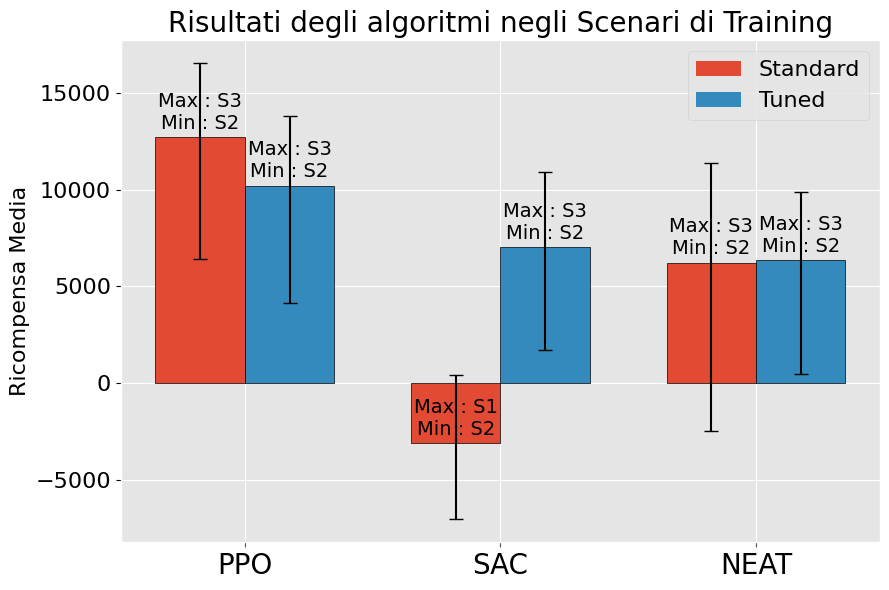

In [84]:
# Example usage:
# labels = ['PPO', 'SAC', 'NEAT']
# standard_rewards_all_scenarios = [
#     [mean_reward_ppo_s1_standard, mean_reward_sac_s1_standard, mean_reward_neat_s1_standard],
#     [mean_reward_ppo_s2_standard, mean_reward_sac_s2_standard, mean_reward_neat_s2_standard],
#     [mean_reward_ppo_s3_standard, mean_reward_sac_s3_standard, mean_reward_neat_s3_standard]
# ]
# tuned_rewards_all_scenarios = [
#     [mean_reward_ppo_s1_tuned, mean_reward_sac_s1_tuned, mean_reward_neat_s1_tuned],
#     [mean_reward_ppo_s2_tuned, mean_reward_sac_s2_tuned, mean_reward_neat_s2_tuned],
#     [mean_reward_ppo_s3_tuned, mean_reward_sac_s3_tuned, mean_reward_neat_s3_tuned]
# ]

# plot_avg_rewards(standard_rewards_all_scenarios, tuned_rewards_all_scenarios, labels)

labels = ['PPO', 'SAC', 'NEAT']
scenario_labels = ['S1', 'S2', 'S3']

mean_reward_ppo_s1_standard = p_s_s1s1['Ricompensa Totale'].mean()
mean_reward_sac_s1_standard = s_s_s1s1['Ricompensa Totale'].mean()
mean_reward_neat_s1_standard = n_s_s1s1['Ricompensa Totale'].mean()

mean_reward_ppo_s1_tuned = p_t_s1s1['Ricompensa Totale'].mean()
mean_reward_sac_s1_tuned = s_t_s1s1['Ricompensa Totale'].mean()
mean_reward_neat_s1_tuned = n_t_s1s1['Ricompensa Totale'].mean()

mean_reward_ppo_s2_standard = p_s_s2s2['Ricompensa Totale'].mean()
mean_reward_sac_s2_standard = s_s_s2s2['Ricompensa Totale'].mean()
mean_reward_neat_s2_standard = n_s_s2s2['Ricompensa Totale'].mean()

mean_reward_ppo_s2_tuned = p_t_s2s2['Ricompensa Totale'].mean()
mean_reward_sac_s2_tuned = s_t_s2s2['Ricompensa Totale'].mean()
mean_reward_neat_s2_tuned = n_t_s2s2['Ricompensa Totale'].mean()

mean_reward_ppo_s3_standard = p_s_s3s3['Ricompensa Totale'].mean()
mean_reward_sac_s3_standard = s_s_s3s3['Ricompensa Totale'].mean()
mean_reward_neat_s3_standard = n_s_s3s3['Ricompensa Totale'].mean()

mean_reward_ppo_s3_tuned = p_t_s3s3['Ricompensa Totale'].mean()
mean_reward_sac_s3_tuned = s_t_s3s3['Ricompensa Totale'].mean()
mean_reward_neat_s3_tuned = n_t_s3s3['Ricompensa Totale'].mean()

standard_rewards_all_scenarios = [
    [mean_reward_ppo_s1_standard, mean_reward_sac_s1_standard, mean_reward_neat_s1_standard],
    [mean_reward_ppo_s2_standard, mean_reward_sac_s2_standard, mean_reward_neat_s2_standard],
    [mean_reward_ppo_s3_standard, mean_reward_sac_s3_standard, mean_reward_neat_s3_standard]
]

tuned_rewards_all_scenarios = [
    [mean_reward_ppo_s1_tuned, mean_reward_sac_s1_tuned, mean_reward_neat_s1_tuned],
    [mean_reward_ppo_s2_tuned, mean_reward_sac_s2_tuned, mean_reward_neat_s2_tuned],
    [mean_reward_ppo_s3_tuned, mean_reward_sac_s3_tuned, mean_reward_neat_s3_tuned]
]

plot_avg_rewards(standard_rewards_all_scenarios, tuned_rewards_all_scenarios, labels, scenario_labels)

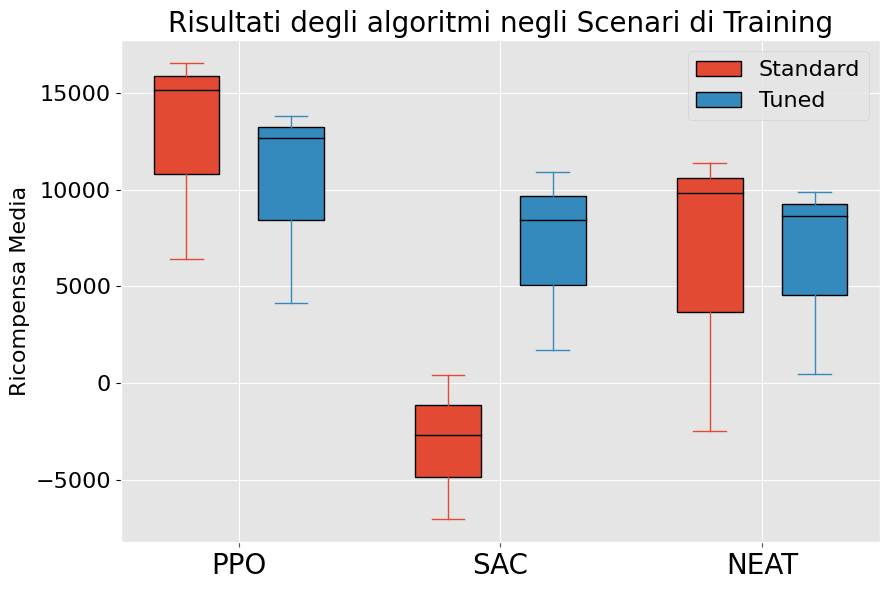

In [85]:
labels = ['PPO', 'SAC', 'NEAT']
scenario_labels = ['S1', 'S2', 'S3']

mean_reward_ppo_s1_standard = p_s_s1s1['Ricompensa Totale'].mean()
mean_reward_sac_s1_standard = s_s_s1s1['Ricompensa Totale'].mean()
mean_reward_neat_s1_standard = n_s_s1s1['Ricompensa Totale'].mean()

mean_reward_ppo_s1_tuned = p_t_s1s1['Ricompensa Totale'].mean()
mean_reward_sac_s1_tuned = s_t_s1s1['Ricompensa Totale'].mean()
mean_reward_neat_s1_tuned = n_t_s1s1['Ricompensa Totale'].mean()

mean_reward_ppo_s2_standard = p_s_s2s2['Ricompensa Totale'].mean()
mean_reward_sac_s2_standard = s_s_s2s2['Ricompensa Totale'].mean()
mean_reward_neat_s2_standard = n_s_s2s2['Ricompensa Totale'].mean()

mean_reward_ppo_s2_tuned = p_t_s2s2['Ricompensa Totale'].mean()
mean_reward_sac_s2_tuned = s_t_s2s2['Ricompensa Totale'].mean()
mean_reward_neat_s2_tuned = n_t_s2s2['Ricompensa Totale'].mean()

mean_reward_ppo_s3_standard = p_s_s3s3['Ricompensa Totale'].mean()
mean_reward_sac_s3_standard = s_s_s3s3['Ricompensa Totale'].mean()
mean_reward_neat_s3_standard = n_s_s3s3['Ricompensa Totale'].mean()

mean_reward_ppo_s3_tuned = p_t_s3s3['Ricompensa Totale'].mean()
mean_reward_sac_s3_tuned = s_t_s3s3['Ricompensa Totale'].mean()
mean_reward_neat_s3_tuned = n_t_s3s3['Ricompensa Totale'].mean()

standard_rewards_all_scenarios = [
    [mean_reward_ppo_s1_standard, mean_reward_sac_s1_standard, mean_reward_neat_s1_standard],
    [mean_reward_ppo_s2_standard, mean_reward_sac_s2_standard, mean_reward_neat_s2_standard],
    [mean_reward_ppo_s3_standard, mean_reward_sac_s3_standard, mean_reward_neat_s3_standard]
]

tuned_rewards_all_scenarios = [
    [mean_reward_ppo_s1_tuned, mean_reward_sac_s1_tuned, mean_reward_neat_s1_tuned],
    [mean_reward_ppo_s2_tuned, mean_reward_sac_s2_tuned, mean_reward_neat_s2_tuned],
    [mean_reward_ppo_s3_tuned, mean_reward_sac_s3_tuned, mean_reward_neat_s3_tuned]
]

plot_avg_rewards_boxplot(standard_rewards_all_scenarios, tuned_rewards_all_scenarios, labels, scenario_labels)

## Test reward results

In [86]:
def plot_test_rewards(training_scenario, test_reward_standard, test_reward_tuned, labels, test_scenarios):
    num_algorithms = len(labels)
    num_tests = len(test_scenarios)
    x = np.arange(num_algorithms) * num_tests  # the label locations
    width = 0.35  # the width of the bars
    
    fig, ax = plt.subplots()
    fig.set_size_inches(9, 6)  # Set the figure size: (width, height)
    
    color_standard = 'C0'  # blue
    color_tuned = 'C1'  # orange
    
    for i, scenario in enumerate(test_scenarios):
        rects1 = ax.bar(x + i*(width*2), [reward[i] for reward in test_reward_standard], width, 
                        label=f'Standard - Test in {scenario}', color=color_standard, edgecolor='black')
        rects2 = ax.bar(x + i*(width*2) + width, [reward[i] for reward in test_reward_tuned], width, 
                        label=f'Tuned - Test in {scenario}', color=color_tuned, edgecolor='black')
        
        # Adding extra labels for test scenarios
        for j, label in enumerate(labels):
            ax.annotate(f'Test in {scenario}',
                        xy=(x[j] + i*(width*2) + width/2, 0),
                        xytext=(0, -15),  # 15 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom',
                        fontsize=12, color='black', rotation=0)

    ax.set_ylabel('Ricompensa Media', fontsize=16, color='black')  
    ax.set_title(f'Performance negli scenari di test (Training in {training_scenario})', fontsize=20, color='black')
    ax.set_xticks(x + 1.5*width)  # Center the algorithm labels
    ax.set_xticklabels(labels, fontsize=20, color='black')
    ax.legend(fontsize=10)
    ax.tick_params(axis='y', labelsize=16, colors='black')

    fig.tight_layout()
    plt.show()

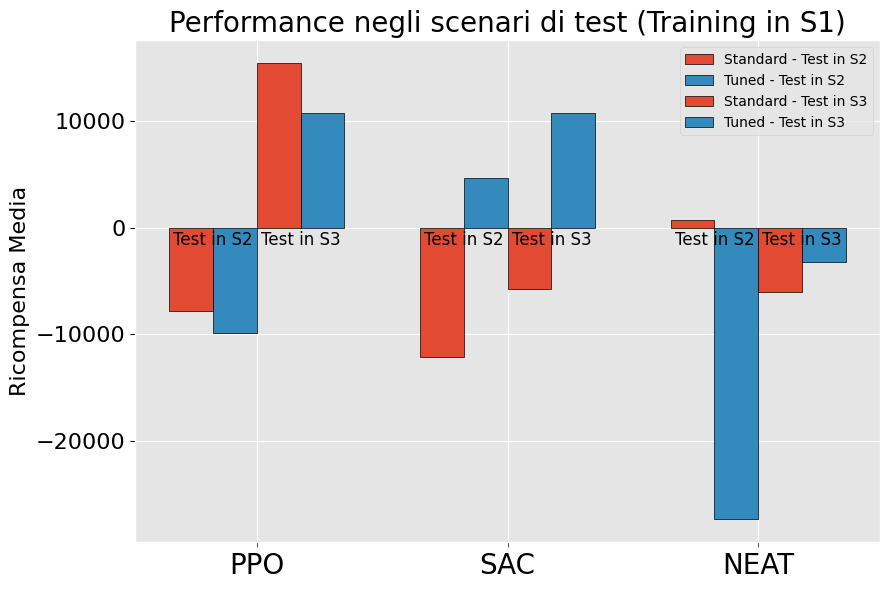

In [87]:
# Example usage:
# labels = ['PPO', 'SAC', 'NEAT']
# training_scenario = 'S1'
# test_scenarios = ['S2', 'S3']
# test_rewards_standard = [
#     [mean_reward_ppo_s2_standard, mean_reward_ppo_s3_standard],
#     [mean_reward_sac_s2_standard, mean_reward_sac_s3_standard],
#     [mean_reward_neat_s2_standard, mean_reward_neat_s3_standard]
# ]
# test_rewards_tuned = [
#     [mean_reward_ppo_s2_tuned, mean_reward_ppo_s3_tuned],
#     [mean_reward_sac_s2_tuned, mean_reward_sac_s3_tuned],
#     [mean_reward_neat_s2_tuned, mean_reward_neat_s3_tuned]
# ]

# plot_test_rewards(training_scenario, test_rewards_standard, test_rewards_tuned, labels, test_scenarios)

labels = ['PPO', 'SAC', 'NEAT']
training_scenario = 'S1'
test_scenarios = ['S2', 'S3']

mean_reward_ppo_s2_standard = p_s_s1s2['Ricompensa Totale'].mean()
mean_reward_sac_s2_standard = s_s_s1s2['Ricompensa Totale'].mean()
mean_reward_neat_s2_standard = n_s_s1s2['Ricompensa Totale'].mean()

mean_reward_ppo_s2_tuned = p_t_s1s2['Ricompensa Totale'].mean()
mean_reward_sac_s2_tuned = s_t_s1s2['Ricompensa Totale'].mean()
mean_reward_neat_s2_tuned = n_t_s1s2['Ricompensa Totale'].mean()

mean_reward_ppo_s3_standard = p_s_s1s3['Ricompensa Totale'].mean()
mean_reward_sac_s3_standard = s_s_s1s3['Ricompensa Totale'].mean()
mean_reward_neat_s3_standard = n_s_s1s3['Ricompensa Totale'].mean()

mean_reward_ppo_s3_tuned = p_t_s1s3['Ricompensa Totale'].mean()
mean_reward_sac_s3_tuned = s_t_s1s3['Ricompensa Totale'].mean()
mean_reward_neat_s3_tuned = n_t_s1s3['Ricompensa Totale'].mean()

test_rewards_standard = [
    [mean_reward_ppo_s2_standard, mean_reward_ppo_s3_standard],
    [mean_reward_sac_s2_standard, mean_reward_sac_s3_standard],
    [mean_reward_neat_s2_standard, mean_reward_neat_s3_standard]
]

test_rewards_tuned = [
    [mean_reward_ppo_s2_tuned, mean_reward_ppo_s3_tuned],
    [mean_reward_sac_s2_tuned, mean_reward_sac_s3_tuned],
    [mean_reward_neat_s2_tuned, mean_reward_neat_s3_tuned]
]

plot_test_rewards(training_scenario, test_rewards_standard, test_rewards_tuned, labels, test_scenarios)

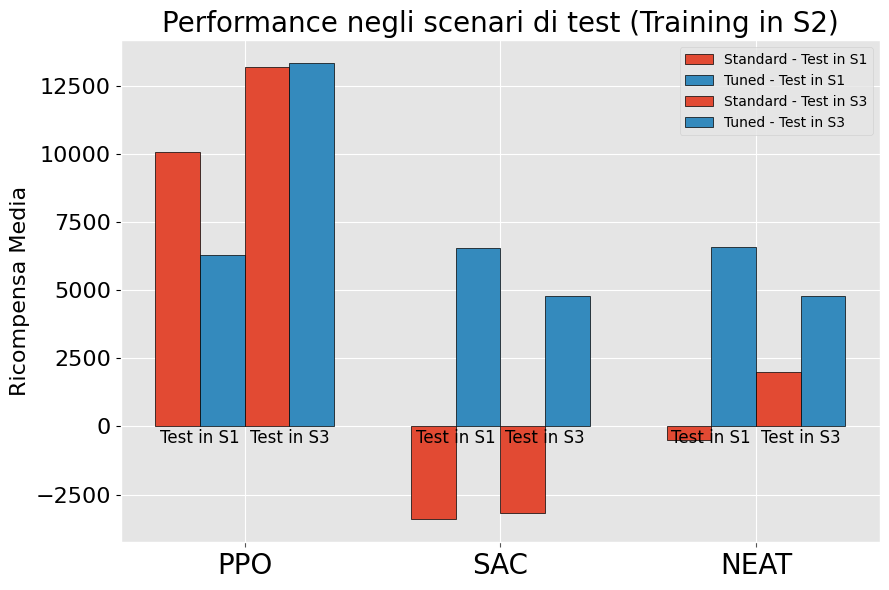

In [88]:
labels = ['PPO', 'SAC', 'NEAT']
training_scenario = 'S2'
test_scenarios = ['S1', 'S3']

mean_reward_ppo_s2_standard = p_s_s2s1['Ricompensa Totale'].mean()
mean_reward_sac_s2_standard = s_s_s2s1['Ricompensa Totale'].mean()
mean_reward_neat_s2_standard = n_s_s2s1['Ricompensa Totale'].mean()

mean_reward_ppo_s2_tuned = p_t_s2s1['Ricompensa Totale'].mean()
mean_reward_sac_s2_tuned = s_t_s2s1['Ricompensa Totale'].mean()
mean_reward_neat_s2_tuned = n_t_s2s1['Ricompensa Totale'].mean()

mean_reward_ppo_s3_standard = p_s_s2s3['Ricompensa Totale'].mean()
mean_reward_sac_s3_standard = s_s_s2s3['Ricompensa Totale'].mean()
mean_reward_neat_s3_standard = n_s_s2s3['Ricompensa Totale'].mean()

mean_reward_ppo_s3_tuned = p_t_s2s3['Ricompensa Totale'].mean()
mean_reward_sac_s3_tuned = s_t_s2s3['Ricompensa Totale'].mean()
mean_reward_neat_s3_tuned = n_t_s2s3['Ricompensa Totale'].mean()

test_rewards_standard = [
    [mean_reward_ppo_s2_standard, mean_reward_ppo_s3_standard],
    [mean_reward_sac_s2_standard, mean_reward_sac_s3_standard],
    [mean_reward_neat_s2_standard, mean_reward_neat_s3_standard]
]

test_rewards_tuned = [
    [mean_reward_ppo_s2_tuned, mean_reward_ppo_s3_tuned],
    [mean_reward_sac_s2_tuned, mean_reward_sac_s3_tuned],
    [mean_reward_neat_s2_tuned, mean_reward_neat_s3_tuned]
]

plot_test_rewards(training_scenario, test_rewards_standard, test_rewards_tuned, labels, test_scenarios)

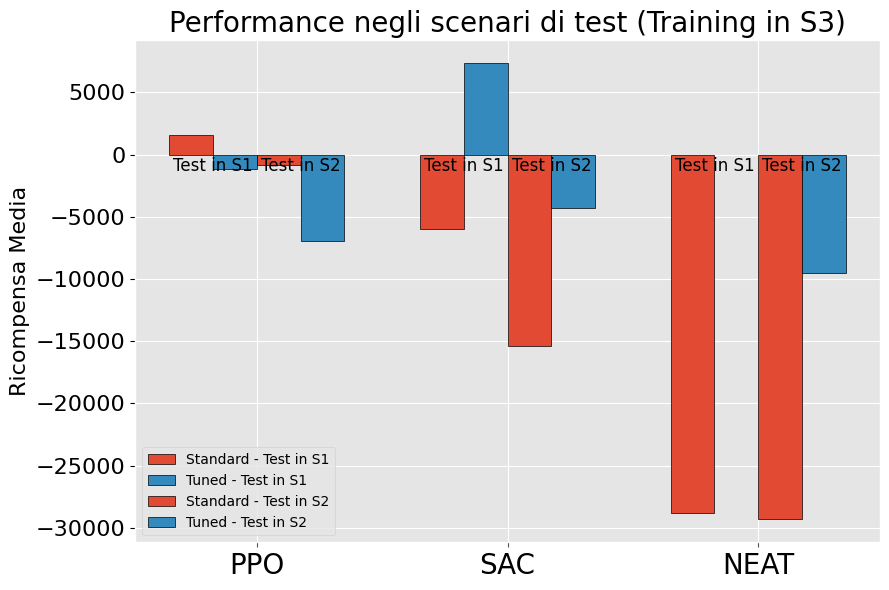

In [89]:
labels = ['PPO', 'SAC', 'NEAT']
training_scenario = 'S3'
test_scenarios = ['S1', 'S2']

mean_reward_ppo_s2_standard = p_s_s3s1['Ricompensa Totale'].mean()
mean_reward_sac_s2_standard = s_s_s3s1['Ricompensa Totale'].mean()
mean_reward_neat_s2_standard = n_s_s3s1['Ricompensa Totale'].mean()

mean_reward_ppo_s2_tuned = p_t_s3s1['Ricompensa Totale'].mean()
mean_reward_sac_s2_tuned = s_t_s3s1['Ricompensa Totale'].mean()
mean_reward_neat_s2_tuned = n_t_s3s1['Ricompensa Totale'].mean()

mean_reward_ppo_s3_standard = p_s_s3s2['Ricompensa Totale'].mean()
mean_reward_sac_s3_standard = s_s_s3s2['Ricompensa Totale'].mean()
mean_reward_neat_s3_standard = n_s_s3s2['Ricompensa Totale'].mean()

mean_reward_ppo_s3_tuned = p_t_s3s2['Ricompensa Totale'].mean()
mean_reward_sac_s3_tuned = s_t_s3s2['Ricompensa Totale'].mean()
mean_reward_neat_s3_tuned = n_t_s3s2['Ricompensa Totale'].mean()

test_rewards_standard = [
    [mean_reward_ppo_s2_standard, mean_reward_ppo_s3_standard],
    [mean_reward_sac_s2_standard, mean_reward_sac_s3_standard],
    [mean_reward_neat_s2_standard, mean_reward_neat_s3_standard]
]

test_rewards_tuned = [
    [mean_reward_ppo_s2_tuned, mean_reward_ppo_s3_tuned],
    [mean_reward_sac_s2_tuned, mean_reward_sac_s3_tuned],
    [mean_reward_neat_s2_tuned, mean_reward_neat_s3_tuned]
]

plot_test_rewards(training_scenario, test_rewards_standard, test_rewards_tuned, labels, test_scenarios)

## Training rejected results

In [90]:
def plot_avg_rejected(standard_rejected_all_scenarios, tuned_rejected_all_scenarios, labels, scenario_labels):
    TOTAL_REQUESTS = 10000  # Total number of requests per episode
    
    avg_standard_rejected = [
        np.mean([scenario_rejected[i] for scenario_rejected in standard_rejected_all_scenarios]) / TOTAL_REQUESTS * 100
        for i in range(len(labels))
    ]
    avg_tuned_rejected = [
        np.mean([scenario_rejected[i] for scenario_rejected in tuned_rejected_all_scenarios]) / TOTAL_REQUESTS * 100
        for i in range(len(labels))
    ]

    err_standard_rejected = [
        [
            (avg_standard_rejected[i] - min([scenario_rejected[i] for scenario_rejected in standard_rejected_all_scenarios]) / TOTAL_REQUESTS * 100),
            (max([scenario_rejected[i] for scenario_rejected in standard_rejected_all_scenarios]) / TOTAL_REQUESTS * 100) - avg_standard_rejected[i]
        ]
        for i in range(len(labels))
    ]
    err_tuned_rejected = [
        [
            (avg_tuned_rejected[i] - min([scenario_rejected[i] for scenario_rejected in tuned_rejected_all_scenarios]) / TOTAL_REQUESTS * 100),
            (max([scenario_rejected[i] for scenario_rejected in tuned_rejected_all_scenarios]) / TOTAL_REQUESTS * 100) - avg_tuned_rejected[i]
        ]
        for i in range(len(labels))
    ]

    # Identifying the best and worst scenario for each algorithm
    best_worst_scenarios_standard = [
        (
            scenario_labels[np.argmax([scenario_rejected[i] for scenario_rejected in standard_rejected_all_scenarios])],
            scenario_labels[np.argmin([scenario_rejected[i] for scenario_rejected in standard_rejected_all_scenarios])]
        )
        for i in range(len(labels))
    ]
    best_worst_scenarios_tuned = [
        (
            scenario_labels[np.argmax([scenario_rejected[i] for scenario_rejected in tuned_rejected_all_scenarios])],
            scenario_labels[np.argmin([scenario_rejected[i] for scenario_rejected in tuned_rejected_all_scenarios])]
        )
        for i in range(len(labels))
    ]

    x = np.arange(len(labels))
    width = 0.35

    fig, ax = plt.subplots()
    fig.set_size_inches(9, 6)

    rects1 = ax.bar(x - width/2, avg_standard_rejected, width, label='Standard', 
                    yerr=np.array(err_standard_rejected).T, capsize=5, color='C0')
    rects2 = ax.bar(x + width/2, avg_tuned_rejected, width, label='Tuned', 
                    yerr=np.array(err_tuned_rejected).T, capsize=5, color='C1')

    # Adding labels to the error bars
    for i, rect in enumerate(rects1):
        height = rect.get_height()
        ax.annotate(f'Max : {best_worst_scenarios_standard[i][0]}\nMin : {best_worst_scenarios_standard[i][1]}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    color='black',
                    fontsize=12)
    for i, rect in enumerate(rects2):
        height = rect.get_height()
        ax.annotate(f'Max : {best_worst_scenarios_tuned[i][0]}\nMin : {best_worst_scenarios_tuned[i][1]}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    color='black',
                    fontsize=12)

    ax.set_ylabel('% Richieste Rifiutate per episodio', fontsize=16, color='black')
    ax.set_title('Richieste rifiutate dagli algoritmi negli Scenari di Training', fontsize=20, color='black')
    ax.set_xticks(x)
    ax.set_xticklabels(labels, fontsize=20, color='black')
    ax.tick_params(axis='y', labelsize=16, colors='black')
        
    for rect in rects1 + rects2:
        rect.set_edgecolor('black')
    ax.legend(fontsize=16)
    #ax.set_ylim(0, 100)
    ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y/100)))
    fig.tight_layout()
    plt.show()

# Example usage:
# labels = ['PPO', 'SAC', 'NEAT']
# scenario_labels = ['S1', 'S2', 'S3']
# standard_rejected_all_scenarios = [
#     [mean_rejected_ppo_s1_standard, mean_rejected_sac_s1_standard, mean_rejected_neat_s1_standard],
#     [mean_rejected_ppo_s2_standard, mean_rejected_sac_s2_standard, mean_rejected_neat_s2_standard],
#     [mean_rejected_ppo_s3_standard, mean_rejected_sac_s3_standard, mean_rejected_neat_s3_standard]
# ]
# tuned_rejected_all_scenarios = [
#     [mean_rejected_ppo_s1_tuned, mean_rejected_sac_s1_tuned, mean_rejected_neat_s1_tuned],
#     [mean_rejected_ppo_s2_tuned, mean_rejected_sac_s2_tuned, mean_rejected_neat_s2_tuned],
#     [mean_rejected_ppo_s3_tuned, mean_rejected_sac_s3_tuned, mean_rejected_neat_s3_tuned]
# ]
# 
# plot_avg_rejected(standard_rejected_all_scenarios, tuned_rejected_all_scenarios, labels)

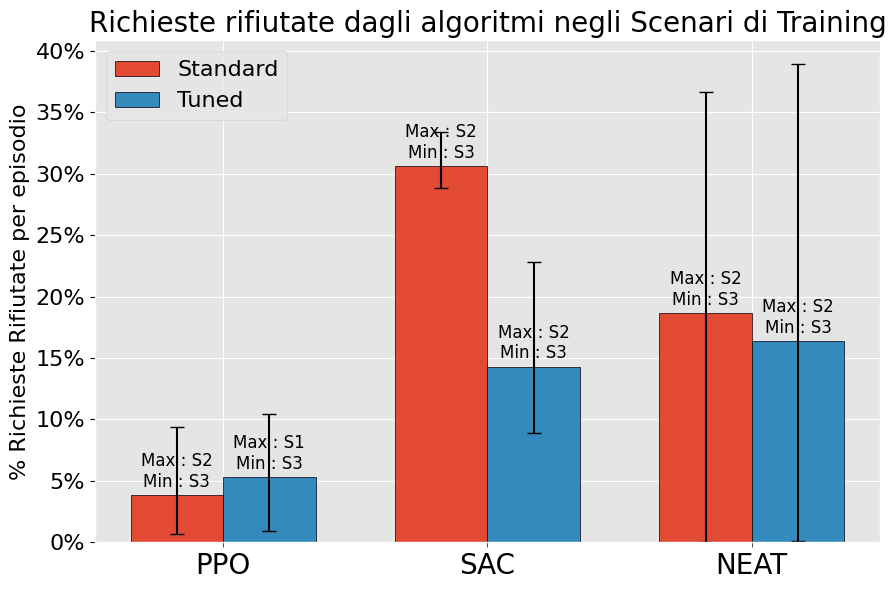

In [91]:
# Example usage:
# labels = ['PPO', 'SAC', 'NEAT']
# scenario_labels = ['S1', 'S2', 'S3']
# standard_rejected_all_scenarios = [
#     [mean_rejected_ppo_s1_standard, mean_rejected_sac_s1_standard, mean_rejected_neat_s1_standard],
#     [mean_rejected_ppo_s2_standard, mean_rejected_sac_s2_standard, mean_rejected_neat_s2_standard],
#     [mean_rejected_ppo_s3_standard, mean_rejected_sac_s3_standard, mean_rejected_neat_s3_standard]
# ]
# tuned_rejected_all_scenarios = [
#     [mean_rejected_ppo_s1_tuned, mean_rejected_sac_s1_tuned, mean_rejected_neat_s1_tuned],
#     [mean_rejected_ppo_s2_tuned, mean_rejected_sac_s2_tuned, mean_rejected_neat_s2_tuned],
#     [mean_rejected_ppo_s3_tuned, mean_rejected_sac_s3_tuned, mean_rejected_neat_s3_tuned]
# ]
# 
# plot_avg_rejected(standard_rejected_all_scenarios, tuned_rejected_all_scenarios, labels)

labels = ['PPO', 'SAC', 'NEAT']
scenario_labels = ['S1', 'S2', 'S3']

mean_rejected_ppo_s1_standard = p_s_s1s1['Richieste Rifiutate'].mean()
mean_rejected_sac_s1_standard = s_s_s1s1['Richieste Rifiutate'].mean()
mean_rejected_neat_s1_standard = n_s_s1s1['Richieste Rifiutate'].mean()

mean_rejected_ppo_s1_tuned = p_t_s1s1['Richieste Rifiutate'].mean()
mean_rejected_sac_s1_tuned = s_t_s1s1['Richieste Rifiutate'].mean()
mean_rejected_neat_s1_tuned = n_t_s1s1['Richieste Rifiutate'].mean()

mean_rejected_ppo_s2_standard = p_s_s2s2['Richieste Rifiutate'].mean()
mean_rejected_sac_s2_standard = s_s_s2s2['Richieste Rifiutate'].mean()
mean_rejected_neat_s2_standard = n_s_s2s2['Richieste Rifiutate'].mean()

mean_rejected_ppo_s2_tuned = p_t_s2s2['Richieste Rifiutate'].mean()
mean_rejected_sac_s2_tuned = s_t_s2s2['Richieste Rifiutate'].mean()
mean_rejected_neat_s2_tuned = n_t_s2s2['Richieste Rifiutate'].mean()

mean_rejected_ppo_s3_standard = p_s_s3s3['Richieste Rifiutate'].mean()
mean_rejected_sac_s3_standard = s_s_s3s3['Richieste Rifiutate'].mean()
mean_rejected_neat_s3_standard = n_s_s3s3['Richieste Rifiutate'].mean()

mean_rejected_ppo_s3_tuned = p_t_s3s3['Richieste Rifiutate'].mean()
mean_rejected_sac_s3_tuned = s_t_s3s3['Richieste Rifiutate'].mean()
mean_rejected_neat_s3_tuned = n_t_s3s3['Richieste Rifiutate'].mean()

standard_rejected_all_scenarios = [
    [mean_rejected_ppo_s1_standard, mean_rejected_sac_s1_standard, mean_rejected_neat_s1_standard],
    [mean_rejected_ppo_s2_standard, mean_rejected_sac_s2_standard, mean_rejected_neat_s2_standard],
    [mean_rejected_ppo_s3_standard, mean_rejected_sac_s3_standard, mean_rejected_neat_s3_standard]
]

tuned_rejected_all_scenarios = [
    [mean_rejected_ppo_s1_tuned, mean_rejected_sac_s1_tuned, mean_rejected_neat_s1_tuned],
    [mean_rejected_ppo_s2_tuned, mean_rejected_sac_s2_tuned, mean_rejected_neat_s2_tuned],
    [mean_rejected_ppo_s3_tuned, mean_rejected_sac_s3_tuned, mean_rejected_neat_s3_tuned]
]

plot_avg_rejected(standard_rejected_all_scenarios, tuned_rejected_all_scenarios, labels, scenario_labels)

## Test rejected results

In [92]:
def plot_test_rejected(training_scenario, test_rejected_standard, test_rejected_tuned, labels, test_scenarios):
    num_algorithms = len(labels)
    num_tests = len(test_scenarios)
    x = np.arange(num_algorithms) * num_tests  # the label locations
    width = 0.35   # the width of the bars
    
    # Convert to percentages
    test_rejected_standard = [[count/100 for count in rejected] for rejected in test_rejected_standard]
    test_rejected_tuned = [[count/100 for count in rejected] for rejected in test_rejected_tuned]
    
    fig, ax = plt.subplots()
    fig.set_size_inches(9, 6)  # Set the figure size: (width, height)
    
    color_standard = 'C0'  # blue
    color_tuned = 'C1'  # orange
    
    for i, scenario in enumerate(test_scenarios):
        rects1 = ax.bar(x + i*(width*2), [rejected[i] for rejected in test_rejected_standard], width, 
                        label=f'Standard - Test in {scenario}', color=color_standard, edgecolor='black')
        rects2 = ax.bar(x + i*(width*2) + width, [rejected[i] for rejected in test_rejected_tuned], width, 
                        label=f'Tuned - Test in {scenario}', color=color_tuned, edgecolor='black')
        
        # Adding extra labels for test scenarios
        for j, label in enumerate(labels):
            ax.annotate(f'Test in {scenario}',
                        xy=(x[j] + i*(width*2) + width/2, 0),
                        xytext=(0, 15),  # 15 points vertical offset
                        textcoords="offset points",
                        ha='center', va='top',
                        fontsize=12, color='black', rotation=0)

    ax.set_ylabel('% delle Richieste Rifiutate', fontsize=16, color='black')
    ax.set_title(f'Performance negli Scenari di Test. (Training in {training_scenario})', fontsize=20, color='black')
    ax.set_xticks(x + 1.5*width)
    ax.set_xticklabels(labels, fontsize=20, color='black')  
    
    ax.legend(fontsize=16)

    ax.tick_params(axis='y', labelsize=16, colors='black')
    
    #ax.set_ylim(0, 100)  # Set y-axis limits
    ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y/100)))  # Format y-axis as percentage
    fig.tight_layout()
    plt.show()

# Example usage:
# labels = ['PPO', 'SAC', 'NEAT']
# training_scenario = 'S1'
# test_scenarios = ['S2', 'S3']
# test_rejected_standard = [
#     [mean_rejected_ppo_s2_standard, mean_rejected_ppo_s3_standard],
#     [mean_rejected_sac_s2_standard, mean_rejected_sac_s3_standard],
#     [mean_rejected_neat_s2_standard, mean_rejected_neat_s3_standard]
# ]
# test_rejected_tuned = [
#     [mean_rejected_ppo_s2_tuned, mean_rejected_ppo_s3_tuned],
#     [mean_rejected_sac_s2_tuned, mean_rejected_sac_s3_tuned],
#     [mean_rejected_neat_s2_tuned, mean_rejected_neat_s3_tuned]
# ]

# plot_test_rejected(training_scenario, test_rejected_standard, test_rejected_tuned, labels, test_scenarios)

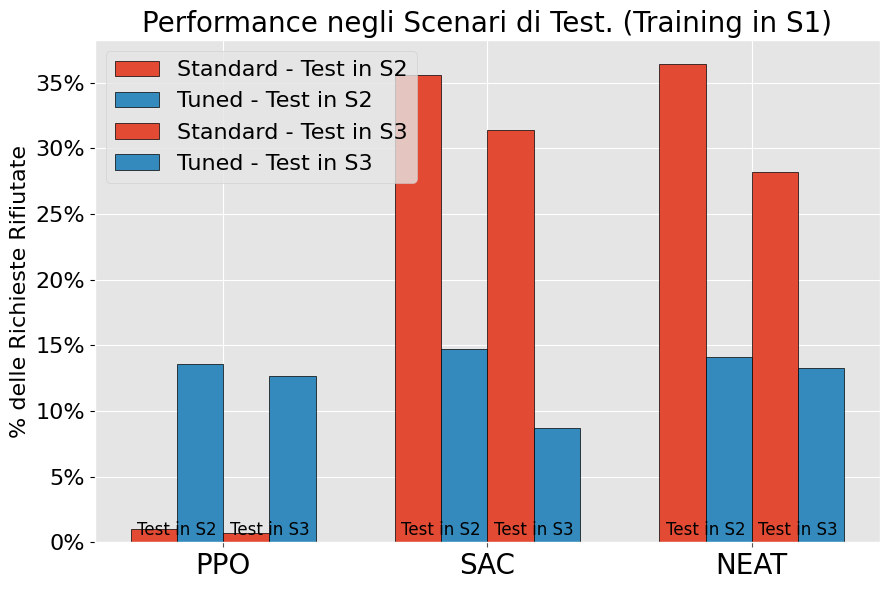

In [93]:
# Example usage:
# labels = ['PPO', 'SAC', 'NEAT']
# training_scenario = 'S1'
# test_scenarios = ['S2', 'S3']
# test_rejected_standard = [
#     [mean_rejected_ppo_s2_standard, mean_rejected_ppo_s3_standard],
#     [mean_rejected_sac_s2_standard, mean_rejected_sac_s3_standard],
#     [mean_rejected_neat_s2_standard, mean_rejected_neat_s3_standard]
# ]
# test_rejected_tuned = [
#     [mean_rejected_ppo_s2_tuned, mean_rejected_ppo_s3_tuned],
#     [mean_rejected_sac_s2_tuned, mean_rejected_sac_s3_tuned],
#     [mean_rejected_neat_s2_tuned, mean_rejected_neat_s3_tuned]
# ]

# plot_test_rejected(training_scenario, test_rejected_standard, test_rejected_tuned, labels, test_scenarios)

labels = ['PPO', 'SAC', 'NEAT']
training_scenario = 'S1'
test_scenarios = ['S2', 'S3']

mean_rejected_ppo_s2_standard = p_s_s1s2['Richieste Rifiutate'].mean()
mean_rejected_sac_s2_standard = s_s_s1s2['Richieste Rifiutate'].mean()
mean_rejected_neat_s2_standard = n_s_s1s2['Richieste Rifiutate'].mean()

mean_rejected_ppo_s2_tuned = p_t_s1s2['Richieste Rifiutate'].mean()
mean_rejected_sac_s2_tuned = s_t_s1s2['Richieste Rifiutate'].mean()
mean_rejected_neat_s2_tuned = n_t_s1s2['Richieste Rifiutate'].mean()

mean_rejected_ppo_s3_standard = p_s_s1s3['Richieste Rifiutate'].mean()
mean_rejected_sac_s3_standard = s_s_s1s3['Richieste Rifiutate'].mean()
mean_rejected_neat_s3_standard = n_s_s1s3['Richieste Rifiutate'].mean()

mean_rejected_ppo_s3_tuned = p_t_s1s3['Richieste Rifiutate'].mean()
mean_rejected_sac_s3_tuned = s_t_s1s3['Richieste Rifiutate'].mean()
mean_rejected_neat_s3_tuned = n_t_s1s3['Richieste Rifiutate'].mean()

test_rejected_standard = [
    [mean_rejected_ppo_s2_standard, mean_rejected_ppo_s3_standard],
    [mean_rejected_sac_s2_standard, mean_rejected_sac_s3_standard],
    [mean_rejected_neat_s2_standard, mean_rejected_neat_s3_standard]
]

test_rejected_tuned = [
    [mean_rejected_ppo_s2_tuned, mean_rejected_ppo_s3_tuned],
    [mean_rejected_sac_s2_tuned, mean_rejected_sac_s3_tuned],
    [mean_rejected_neat_s2_tuned, mean_rejected_neat_s3_tuned]
]

plot_test_rejected(training_scenario, test_rejected_standard, test_rejected_tuned, labels, test_scenarios)

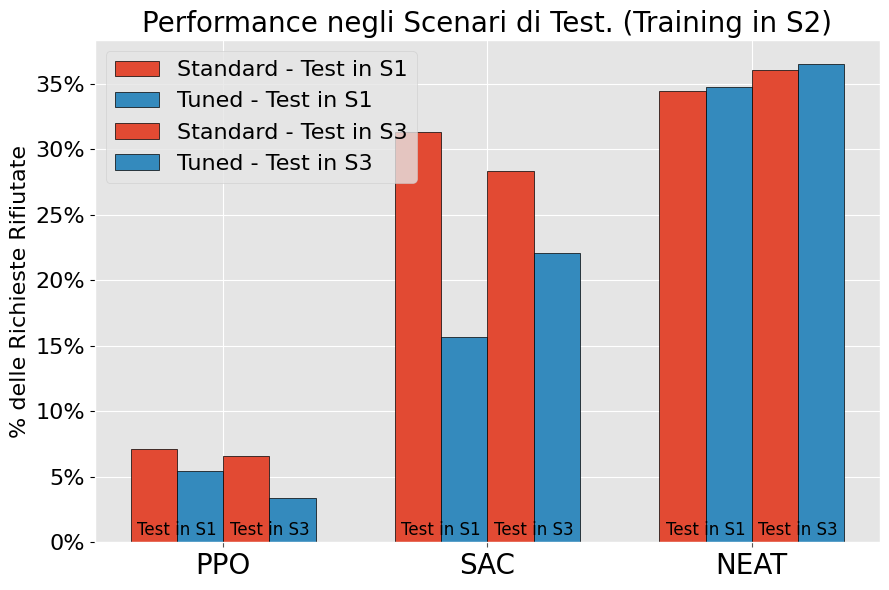

In [94]:
labels = ['PPO', 'SAC', 'NEAT']
training_scenario = 'S2'
test_scenarios = ['S1', 'S3']

mean_rejected_ppo_s1_standard = p_s_s2s1['Richieste Rifiutate'].mean()
mean_rejected_sac_s1_standard = s_s_s2s1['Richieste Rifiutate'].mean()
mean_rejected_neat_s1_standard = n_s_s2s1['Richieste Rifiutate'].mean()

mean_rejected_ppo_s1_tuned = p_t_s2s1['Richieste Rifiutate'].mean()
mean_rejected_sac_s1_tuned = s_t_s2s1['Richieste Rifiutate'].mean()
mean_rejected_neat_s1_tuned = n_t_s2s1['Richieste Rifiutate'].mean()

mean_rejected_ppo_s3_standard = p_s_s2s3['Richieste Rifiutate'].mean()
mean_rejected_sac_s3_standard = s_s_s2s3['Richieste Rifiutate'].mean()
mean_rejected_neat_s3_standard = n_s_s2s3['Richieste Rifiutate'].mean()

mean_rejected_ppo_s3_tuned = p_t_s2s3['Richieste Rifiutate'].mean()
mean_rejected_sac_s3_tuned = s_t_s2s3['Richieste Rifiutate'].mean()
mean_rejected_neat_s3_tuned = n_t_s2s3['Richieste Rifiutate'].mean()

test_rejected_standard = [
    [mean_rejected_ppo_s1_standard, mean_rejected_ppo_s3_standard],
    [mean_rejected_sac_s1_standard, mean_rejected_sac_s3_standard],
    [mean_rejected_neat_s1_standard, mean_rejected_neat_s3_standard]
]

test_rejected_tuned = [
    [mean_rejected_ppo_s1_tuned, mean_rejected_ppo_s3_tuned],
    [mean_rejected_sac_s1_tuned, mean_rejected_sac_s3_tuned],
    [mean_rejected_neat_s1_tuned, mean_rejected_neat_s3_tuned]
]

plot_test_rejected(training_scenario, test_rejected_standard, test_rejected_tuned, labels, test_scenarios)

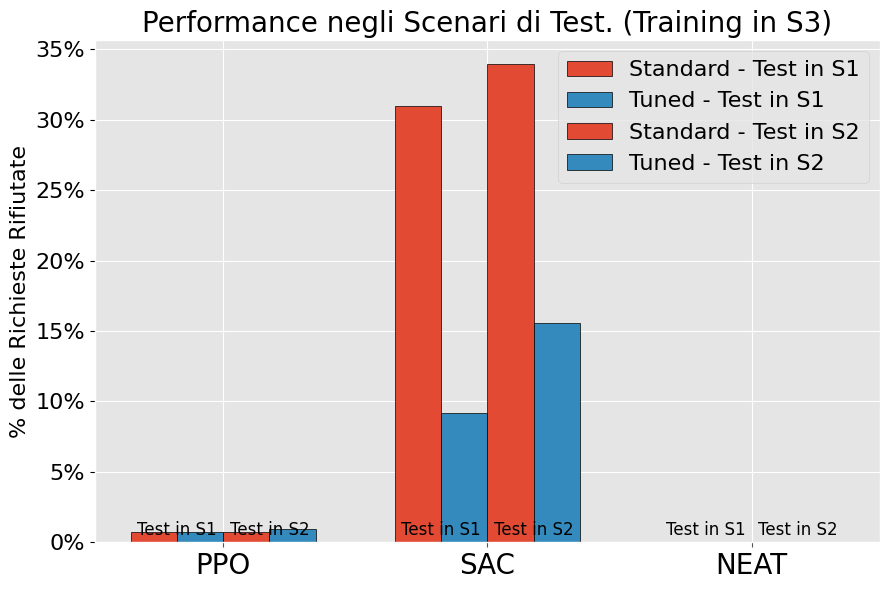

In [95]:
labels = ['PPO', 'SAC', 'NEAT']
training_scenario = 'S3'
test_scenarios = ['S1', 'S2']

mean_rejected_ppo_s1_standard = p_s_s3s1['Richieste Rifiutate'].mean()
mean_rejected_sac_s1_standard = s_s_s3s1['Richieste Rifiutate'].mean()
mean_rejected_neat_s1_standard = n_s_s3s1['Richieste Rifiutate'].mean()

mean_rejected_ppo_s1_tuned = p_t_s3s1['Richieste Rifiutate'].mean()
mean_rejected_sac_s1_tuned = s_t_s3s1['Richieste Rifiutate'].mean()
mean_rejected_neat_s1_tuned = n_t_s3s1['Richieste Rifiutate'].mean()

mean_rejected_ppo_s2_standard = p_s_s3s2['Richieste Rifiutate'].mean()
mean_rejected_sac_s2_standard = s_s_s3s2['Richieste Rifiutate'].mean()
mean_rejected_neat_s2_standard = n_s_s3s2['Richieste Rifiutate'].mean()

mean_rejected_ppo_s2_tuned = p_t_s3s2['Richieste Rifiutate'].mean()
mean_rejected_sac_s2_tuned = s_t_s3s2['Richieste Rifiutate'].mean()
mean_rejected_neat_s2_tuned = n_t_s3s2['Richieste Rifiutate'].mean()

test_rejected_standard = [
    [mean_rejected_ppo_s1_standard, mean_rejected_ppo_s2_standard],
    [mean_rejected_sac_s1_standard, mean_rejected_sac_s2_standard],
    [mean_rejected_neat_s1_standard, mean_rejected_neat_s2_standard]
]

test_rejected_tuned = [
    [mean_rejected_ppo_s1_tuned, mean_rejected_ppo_s2_tuned],
    [mean_rejected_sac_s1_tuned, mean_rejected_sac_s2_tuned],
    [mean_rejected_neat_s1_tuned, mean_rejected_neat_s2_tuned]
]

plot_test_rejected(training_scenario, test_rejected_standard, test_rejected_tuned, labels, test_scenarios)

## Train congestione results

In [96]:
def plot_avg_cong(standard_cong_all_scenarios, tuned_cong_all_scenarios, labels, scenario_labels):
    avg_standard_cong = [
        np.mean([scenario_cong[i] for scenario_cong in standard_cong_all_scenarios])
        for i in range(len(labels))
    ]
    avg_tuned_cong = [
        np.mean([scenario_cong[i] for scenario_cong in tuned_cong_all_scenarios])
        for i in range(len(labels))
    ]

    err_standard_cong = [
        [
            avg_standard_cong[i] - min([scenario_cong[i] for scenario_cong in standard_cong_all_scenarios]),
            max([scenario_cong[i] for scenario_cong in standard_cong_all_scenarios]) - avg_standard_cong[i]
        ]
        for i in range(len(labels))
    ]
    err_tuned_cong = [
        [
            avg_tuned_cong[i] - min([scenario_cong[i] for scenario_cong in tuned_cong_all_scenarios]),
            max([scenario_cong[i] for scenario_cong in tuned_cong_all_scenarios]) - avg_tuned_cong[i]
        ]
        for i in range(len(labels))
    ]

    # Identifying the best and worst scenario for each algorithm
    best_worst_scenarios_standard = [
        (
            scenario_labels[np.argmax([scenario_cong[i] for scenario_cong in standard_cong_all_scenarios])],
            scenario_labels[np.argmin([scenario_cong[i] for scenario_cong in standard_cong_all_scenarios])]
        )
        for i in range(len(labels))
    ]
    best_worst_scenarios_tuned = [
        (
            scenario_labels[np.argmax([scenario_cong[i] for scenario_cong in tuned_cong_all_scenarios])],
            scenario_labels[np.argmin([scenario_cong[i] for scenario_cong in tuned_cong_all_scenarios])]
        )
        for i in range(len(labels))
    ]

    x = np.arange(len(labels))
    width = 0.35

    fig, ax = plt.subplots()
    fig.set_size_inches(9, 6)

    rects1 = ax.bar(x - width/2, avg_standard_cong, width, label='Standard', 
                    yerr=np.array(err_standard_cong).T, capsize=5)
    rects2 = ax.bar(x + width/2, avg_tuned_cong, width, label='Tuned', 
                    yerr=np.array(err_tuned_cong).T, capsize=5)

    # Adding labels to the error bars
    for i, rect in enumerate(rects1):
        height = rect.get_height()
        ax.annotate(f'Max : {best_worst_scenarios_standard[i][0]}\nMin : {best_worst_scenarios_standard[i][1]}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize = 12)
    for i, rect in enumerate(rects2):
        height = rect.get_height()
        ax.annotate(f'Max : {best_worst_scenarios_tuned[i][0]}\nMin : {best_worst_scenarios_tuned[i][1]}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize = 12)

    ax.set_ylabel('Media degli steps in congestione', fontsize=16, color='black')
    ax.set_title('Steps in congestione effettuati negli Scenari di Training', fontsize=20, color='black')
    ax.set_xticks(x)
    ax.set_xticklabels(labels, fontsize=20, color='black')
    ax.legend(fontsize=16)
    ax.tick_params(axis='y', labelsize=16, colors='black')
    for rect in rects1 + rects2:
        rect.set_edgecolor('black')
    ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y/100)))
    
    fig.tight_layout()
    plt.show()

# Example usage:
# labels = ['PPO', 'SAC', 'NEAT']
# scenario_labels = ['S1', 'S2', 'S3']
# standard_cong_all_scenarios = [
#     [mean_cong_ppo_s1_standard, mean_cong_sac_s1_standard, mean_cong_neat_s1_standard],
#     [mean_cong_ppo_s2_standard, mean_cong_sac_s2_standard, mean_cong_neat_s2_standard],
#     [mean_cong_ppo_s3_standard, mean_cong_sac_s3_standard, mean_cong_neat_s3_standard]
# ]
# tuned_cong_all_scenarios = [
#     [mean_cong_ppo_s1_tuned, mean_cong_sac_s1_tuned, mean_cong_neat_s1_tuned],
#     [mean_cong_ppo_s2_tuned, mean_cong_sac_s2_tuned, mean_cong_neat_s2_tuned],
#     [mean_cong_ppo_s3_tuned, mean_cong_sac_s3_tuned, mean_cong_neat_s3_tuned]
# ]
# 
# plot_avg_cong(standard_cong_all_scenarios, tuned_cong_all_scenarios, labels)

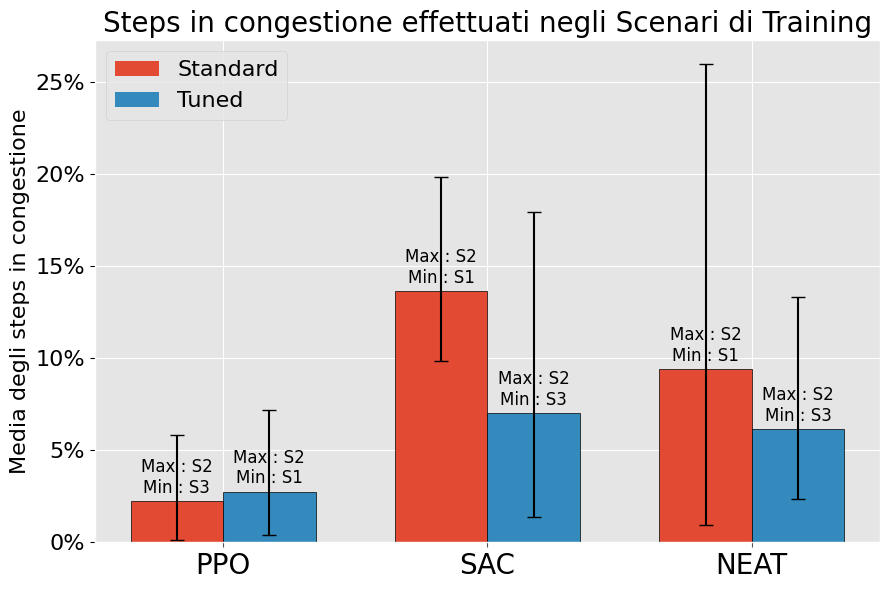

In [97]:
# Example usage:
# labels = ['PPO', 'SAC', 'NEAT']
# scenario_labels = ['S1', 'S2', 'S3']
# standard_cong_all_scenarios = [
#     [mean_cong_ppo_s1_standard, mean_cong_sac_s1_standard, mean_cong_neat_s1_standard],
#     [mean_cong_ppo_s2_standard, mean_cong_sac_s2_standard, mean_cong_neat_s2_standard],
#     [mean_cong_ppo_s3_standard, mean_cong_sac_s3_standard, mean_cong_neat_s3_standard]
# ]
# tuned_cong_all_scenarios = [
#     [mean_cong_ppo_s1_tuned, mean_cong_sac_s1_tuned, mean_cong_neat_s1_tuned],
#     [mean_cong_ppo_s2_tuned, mean_cong_sac_s2_tuned, mean_cong_neat_s2_tuned],
#     [mean_cong_ppo_s3_tuned, mean_cong_sac_s3_tuned, mean_cong_neat_s3_tuned]
# ]
# 
# plot_avg_cong(standard_cong_all_scenarios, tuned_cong_all_scenarios, labels)

labels = ['PPO', 'SAC', 'NEAT']
scenario_labels = ['S1', 'S2', 'S3']

mean_cong_ppo_s1_standard = p_s_s1s1['Steps in Congestione'].mean()
mean_cong_sac_s1_standard = s_s_s1s1['Steps in Congestione'].mean()
mean_cong_neat_s1_standard = n_s_s1s1['Steps in Congestione'].mean()

mean_cong_ppo_s1_tuned = p_t_s1s1['Steps in Congestione'].mean()
mean_cong_sac_s1_tuned = s_t_s1s1['Steps in Congestione'].mean()
mean_cong_neat_s1_tuned = n_t_s1s1['Steps in Congestione'].mean()

mean_cong_ppo_s2_standard = p_s_s2s2['Steps in Congestione'].mean()
mean_cong_sac_s2_standard = s_s_s2s2['Steps in Congestione'].mean()
mean_cong_neat_s2_standard = n_s_s2s2['Steps in Congestione'].mean()

mean_cong_ppo_s2_tuned = p_t_s2s2['Steps in Congestione'].mean()
mean_cong_sac_s2_tuned = s_t_s2s2['Steps in Congestione'].mean()
mean_cong_neat_s2_tuned = n_t_s2s2['Steps in Congestione'].mean()

mean_cong_ppo_s3_standard = p_s_s3s3['Steps in Congestione'].mean()
mean_cong_sac_s3_standard = s_s_s3s3['Steps in Congestione'].mean()
mean_cong_neat_s3_standard = n_s_s3s3['Steps in Congestione'].mean()

mean_cong_ppo_s3_tuned = p_t_s3s3['Steps in Congestione'].mean()
mean_cong_sac_s3_tuned = s_t_s3s3['Steps in Congestione'].mean()
mean_cong_neat_s3_tuned = n_t_s3s3['Steps in Congestione'].mean()

standard_cong_all_scenarios = [
    [mean_cong_ppo_s1_standard, mean_cong_sac_s1_standard, mean_cong_neat_s1_standard],
    [mean_cong_ppo_s2_standard, mean_cong_sac_s2_standard, mean_cong_neat_s2_standard],
    [mean_cong_ppo_s3_standard, mean_cong_sac_s3_standard, mean_cong_neat_s3_standard]
]

tuned_cong_all_scenarios = [
    [mean_cong_ppo_s1_tuned, mean_cong_sac_s1_tuned, mean_cong_neat_s1_tuned],
    [mean_cong_ppo_s2_tuned, mean_cong_sac_s2_tuned, mean_cong_neat_s2_tuned],
    [mean_cong_ppo_s3_tuned, mean_cong_sac_s3_tuned, mean_cong_neat_s3_tuned]
]

plot_avg_cong(standard_cong_all_scenarios, tuned_cong_all_scenarios, labels, scenario_labels)

## Test congestion results

In [98]:
def plot_test_cong(training_scenario, test_cong_standard, test_cong_tuned, labels, test_scenarios):
    num_algorithms = len(labels)
    num_tests = len(test_scenarios)
    x = np.arange(num_algorithms) * num_tests  # the label locations
    width = 0.35   # the width of the bars
    
    fig, ax = plt.subplots()
    fig.set_size_inches(9, 6)  # Set the figure size: (width, height)
    
    color_standard = 'C0'  # blue
    color_tuned = 'C1'  # orange
    
    for i, scenario in enumerate(test_scenarios):
        rects1 = ax.bar(x + i*(width*2), [cong[i] for cong in test_cong_standard], width, 
                        label=f'Standard - Test in {scenario}', color=color_standard, edgecolor='black')
        rects2 = ax.bar(x + i*(width*2) + width, [cong[i] for cong in test_cong_tuned], width, 
                        label=f'Tuned - Test in {scenario}', color=color_tuned, edgecolor='black')
        
        # Adding extra labels for test scenarios
        for j, label in enumerate(labels):
            ax.annotate(f'Test in {scenario}',
                        xy=(x[j] + i*(width*2) + width/2, 0),
                        xytext=(0, 5),  # 15 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom',
                        fontsize=14, color='black', rotation=0)

    ax.set_ylabel('Media degli steps in congestione', fontsize=16, color='black')
    ax.set_title(f'Performance negli Scenari di Test (Training in {training_scenario})', fontsize=20, color='black')
    ax.set_xticks(x + 1.5*width)
    ax.set_xticklabels(labels, fontsize=20, color='black')
    ax.legend(fontsize=16)
    ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y/100)))
    ax.tick_params(axis='y', labelsize=16, colors='black')
   
    fig.tight_layout()
    plt.show()

# Example usage:
# labels = ['PPO', 'SAC', 'NEAT']
# training_scenario = 'S1'
# test_scenarios = ['S2', 'S3']
# test_cong_standard = [
#     [mean_cong_ppo_s2_standard, mean_cong_ppo_s3_standard],
#     [mean_cong_sac_s2_standard, mean_cong_sac_s3_standard],
#     [mean_cong_neat_s2_standard, mean_cong_neat_s3_standard]
# ]
# test_cong_tuned = [
#     [mean_cong_ppo_s2_tuned, mean_cong_ppo_s3_tuned],
#     [mean_cong_sac_s2_tuned, mean_cong_sac_s3_tuned],
#     [mean_cong_neat_s2_tuned, mean_cong_neat_s3_tuned]
# ]

# plot_test_cong(training_scenario, test_cong_standard, test_cong_tuned, labels, test_scenarios)

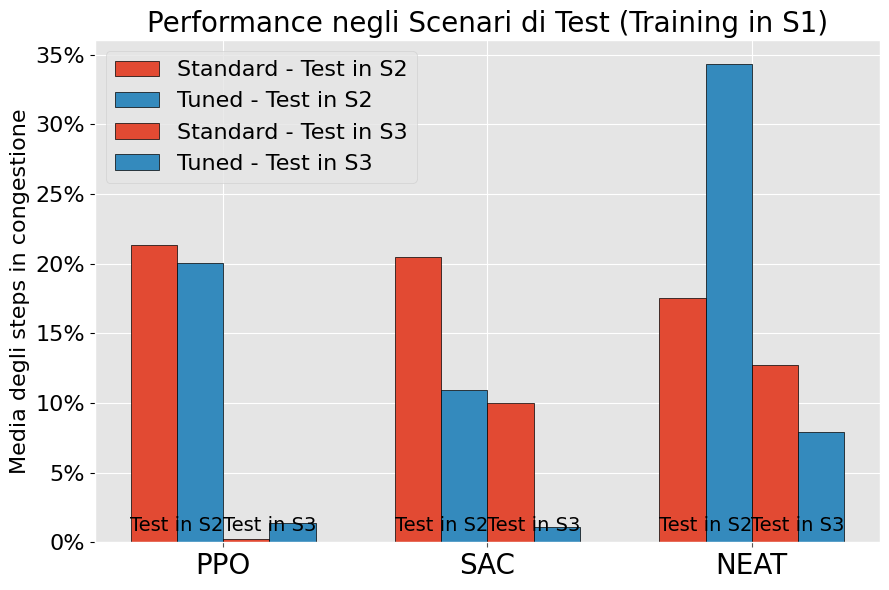

In [99]:
# Example usage:
# labels = ['PPO', 'SAC', 'NEAT']
# training_scenario = 'S1'
# test_scenarios = ['S2', 'S3']
# test_cong_standard = [
#     [mean_cong_ppo_s2_standard, mean_cong_ppo_s3_standard],
#     [mean_cong_sac_s2_standard, mean_cong_sac_s3_standard],
#     [mean_cong_neat_s2_standard, mean_cong_neat_s3_standard]
# ]
# test_cong_tuned = [
#     [mean_cong_ppo_s2_tuned, mean_cong_ppo_s3_tuned],
#     [mean_cong_sac_s2_tuned, mean_cong_sac_s3_tuned],
#     [mean_cong_neat_s2_tuned, mean_cong_neat_s3_tuned]
# ]

# plot_test_cong(training_scenario, test_cong_standard, test_cong_tuned, labels, test_scenarios)

labels = ['PPO', 'SAC', 'NEAT']
training_scenario = 'S1'
test_scenarios = ['S2', 'S3']

mean_cong_ppo_s2_standard = p_s_s1s2['Steps in Congestione'].mean()
mean_cong_sac_s2_standard = s_s_s1s2['Steps in Congestione'].mean()
mean_cong_neat_s2_standard = n_s_s1s2['Steps in Congestione'].mean()

mean_cong_ppo_s2_tuned = p_t_s1s2['Steps in Congestione'].mean()
mean_cong_sac_s2_tuned = s_t_s1s2['Steps in Congestione'].mean()
mean_cong_neat_s2_tuned = n_t_s1s2['Steps in Congestione'].mean()

mean_cong_ppo_s3_standard = p_s_s1s3['Steps in Congestione'].mean()
mean_cong_sac_s3_standard = s_s_s1s3['Steps in Congestione'].mean()
mean_cong_neat_s3_standard = n_s_s1s3['Steps in Congestione'].mean()

mean_cong_ppo_s3_tuned = p_t_s1s3['Steps in Congestione'].mean()
mean_cong_sac_s3_tuned = s_t_s1s3['Steps in Congestione'].mean()
mean_cong_neat_s3_tuned = n_t_s1s3['Steps in Congestione'].mean()

test_cong_standard = [
    [mean_cong_ppo_s2_standard, mean_cong_ppo_s3_standard],
    [mean_cong_sac_s2_standard, mean_cong_sac_s3_standard],
    [mean_cong_neat_s2_standard, mean_cong_neat_s3_standard]
]

test_cong_tuned = [
    [mean_cong_ppo_s2_tuned, mean_cong_ppo_s3_tuned],
    [mean_cong_sac_s2_tuned, mean_cong_sac_s3_tuned],
    [mean_cong_neat_s2_tuned, mean_cong_neat_s3_tuned]
]

plot_test_cong(training_scenario, test_cong_standard, test_cong_tuned, labels, test_scenarios)

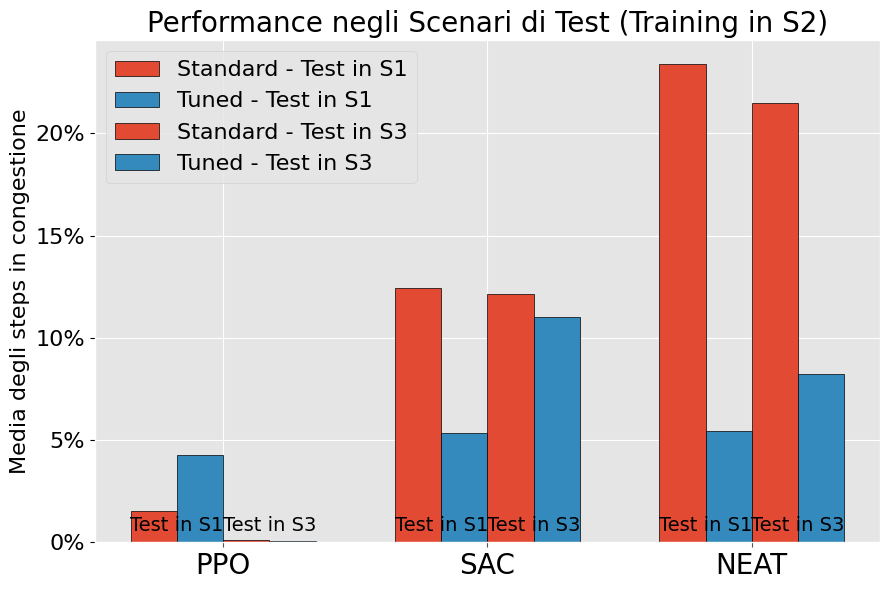

In [100]:
labels = ['PPO', 'SAC', 'NEAT']
training_scenario = 'S2'
test_scenarios = ['S1', 'S3']

mean_cong_ppo_s1_standard = p_s_s2s1['Steps in Congestione'].mean()
mean_cong_sac_s1_standard = s_s_s2s1['Steps in Congestione'].mean()
mean_cong_neat_s1_standard = n_s_s2s1['Steps in Congestione'].mean()

mean_cong_ppo_s1_tuned = p_t_s2s1['Steps in Congestione'].mean()
mean_cong_sac_s1_tuned = s_t_s2s1['Steps in Congestione'].mean()
mean_cong_neat_s1_tuned = n_t_s2s1['Steps in Congestione'].mean()

mean_cong_ppo_s3_standard = p_s_s2s3['Steps in Congestione'].mean()
mean_cong_sac_s3_standard = s_s_s2s3['Steps in Congestione'].mean()
mean_cong_neat_s3_standard = n_s_s2s3['Steps in Congestione'].mean()

mean_cong_ppo_s3_tuned = p_t_s2s3['Steps in Congestione'].mean()
mean_cong_sac_s3_tuned = s_t_s2s3['Steps in Congestione'].mean()
mean_cong_neat_s3_tuned = n_t_s2s3['Steps in Congestione'].mean()

test_cong_standard = [
    [mean_cong_ppo_s1_standard, mean_cong_ppo_s3_standard],
    [mean_cong_sac_s1_standard, mean_cong_sac_s3_standard],
    [mean_cong_neat_s1_standard, mean_cong_neat_s3_standard]
]

test_cong_tuned = [
    [mean_cong_ppo_s1_tuned, mean_cong_ppo_s3_tuned],
    [mean_cong_sac_s1_tuned, mean_cong_sac_s3_tuned],
    [mean_cong_neat_s1_tuned, mean_cong_neat_s3_tuned]
]

plot_test_cong(training_scenario, test_cong_standard, test_cong_tuned, labels, test_scenarios)

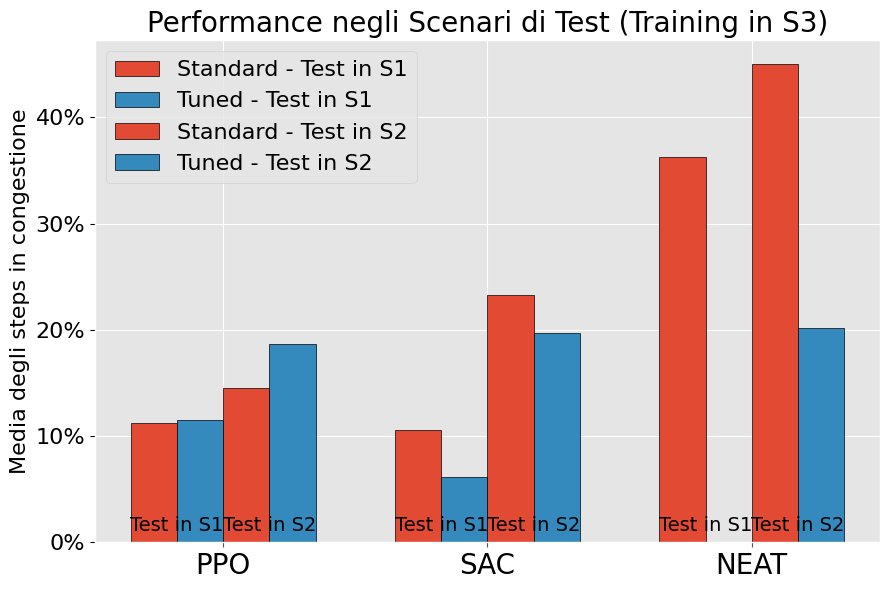

In [101]:
labels = ['PPO', 'SAC', 'NEAT']
training_scenario = 'S3'
test_scenarios = ['S1', 'S2']

mean_cong_ppo_s1_standard = p_s_s3s1['Steps in Congestione'].mean()
mean_cong_sac_s1_standard = s_s_s3s1['Steps in Congestione'].mean()
mean_cong_neat_s1_standard = n_s_s3s1['Steps in Congestione'].mean()

mean_cong_ppo_s1_tuned = p_t_s3s1['Steps in Congestione'].mean()
mean_cong_sac_s1_tuned = s_t_s3s1['Steps in Congestione'].mean()
mean_cong_neat_s1_tuned = n_t_s3s1['Steps in Congestione'].mean()

mean_cong_ppo_s2_standard = p_s_s3s2['Steps in Congestione'].mean()
mean_cong_sac_s2_standard = s_s_s3s2['Steps in Congestione'].mean()
mean_cong_neat_s2_standard = n_s_s3s2['Steps in Congestione'].mean()

mean_cong_ppo_s2_tuned = p_t_s3s2['Steps in Congestione'].mean()
mean_cong_sac_s2_tuned = s_t_s3s2['Steps in Congestione'].mean()
mean_cong_neat_s2_tuned = n_t_s3s2['Steps in Congestione'].mean()

test_cong_standard = [
    [mean_cong_ppo_s1_standard, mean_cong_ppo_s2_standard],
    [mean_cong_sac_s1_standard, mean_cong_sac_s2_standard],
    [mean_cong_neat_s1_standard, mean_cong_neat_s2_standard]
]

test_cong_tuned = [
    [mean_cong_ppo_s1_tuned, mean_cong_ppo_s2_tuned],
    [mean_cong_sac_s1_tuned, mean_cong_sac_s2_tuned],
    [mean_cong_neat_s1_tuned, mean_cong_neat_s2_tuned]
]

plot_test_cong(training_scenario, test_cong_standard, test_cong_tuned, labels, test_scenarios)

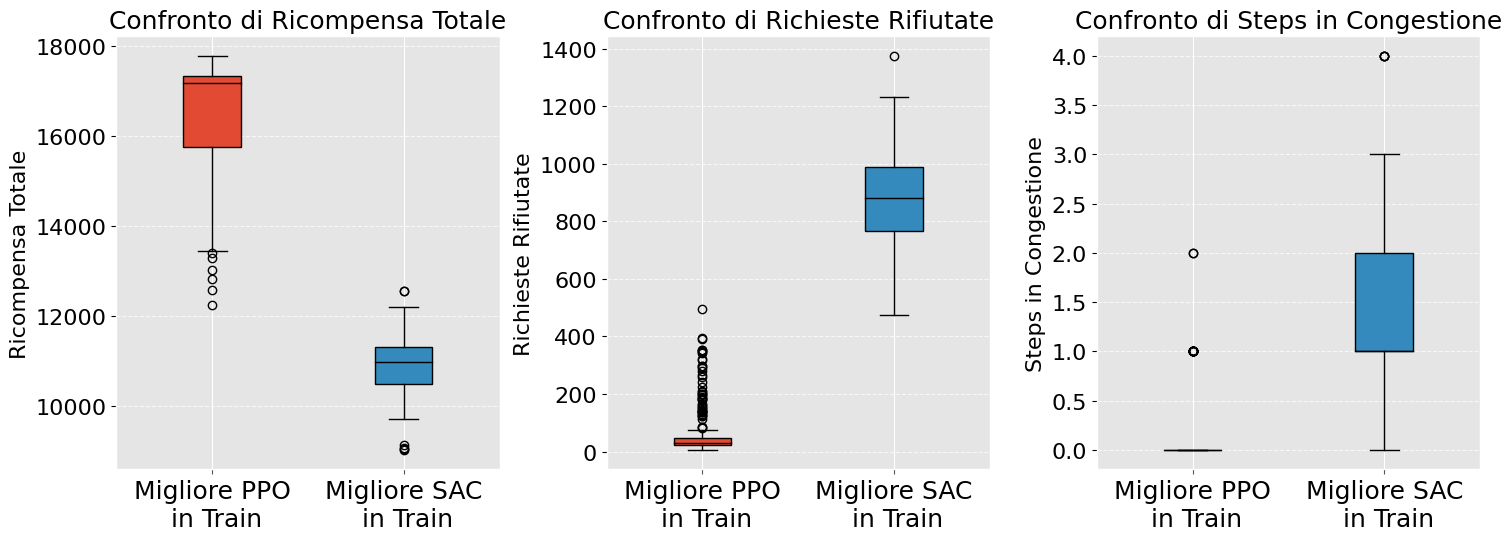

In [103]:
def plot_metrics_boxplot(df_p_s_s3s3, df_s_t_s3s3):
    # Modificando l'ordine delle metriche
    metrics = ['Ricompensa Totale', 'Richieste Rifiutate', 'Steps in Congestione']
    data_p_s_s3s3 = [df_p_s_s3s3[metric] for metric in metrics]
    data_s_t_s3s3 = [df_s_t_s3s3[metric] for metric in metrics]

    fig, axs = plt.subplots(1, len(metrics), figsize=(15, 6))  
    
    for ax, metric, data_1, data_2 in zip(axs, metrics, data_p_s_s3s3, data_s_t_s3s3):
        # Creazione del boxplot con colori specifici
        bp1 = ax.boxplot(data_1, positions=[1], widths=0.3, patch_artist=True, boxprops=dict(facecolor="C0"))
        bp2 = ax.boxplot(data_2, positions=[2], widths=0.3, patch_artist=True, boxprops=dict(facecolor="C1"))

        # Etichettatura degli assi e titolo
        ax.set_ylabel(metric, fontsize=16, color='black')
        ax.set_title(f'Confronto di {metric}', fontsize=18, color='black')
        ax.set_xticks([1, 2])
        ax.set_xticklabels(['Migliore PPO\n in Train', 'Migliore SAC\n in Train'], fontsize=18, color='black')
        
        # Modifica l'aspetto del boxplot
        for element in ['whiskers', 'fliers', 'medians', 'caps']:
            plt.setp(bp1[element], color='black')
            plt.setp(bp2[element], color='black')
        
        # Aggiungere grid e labels
        ax.grid(axis='y', linestyle='--', alpha=0.7)
        ax.tick_params(axis='y', labelsize=16, colors='black')
        
    #fig.suptitle('Confronto tra PPO Standard e SAC Tuned', fontsize=20, color='black')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

plot_metrics_boxplot(p_s_s3s3, s_t_s3s3)

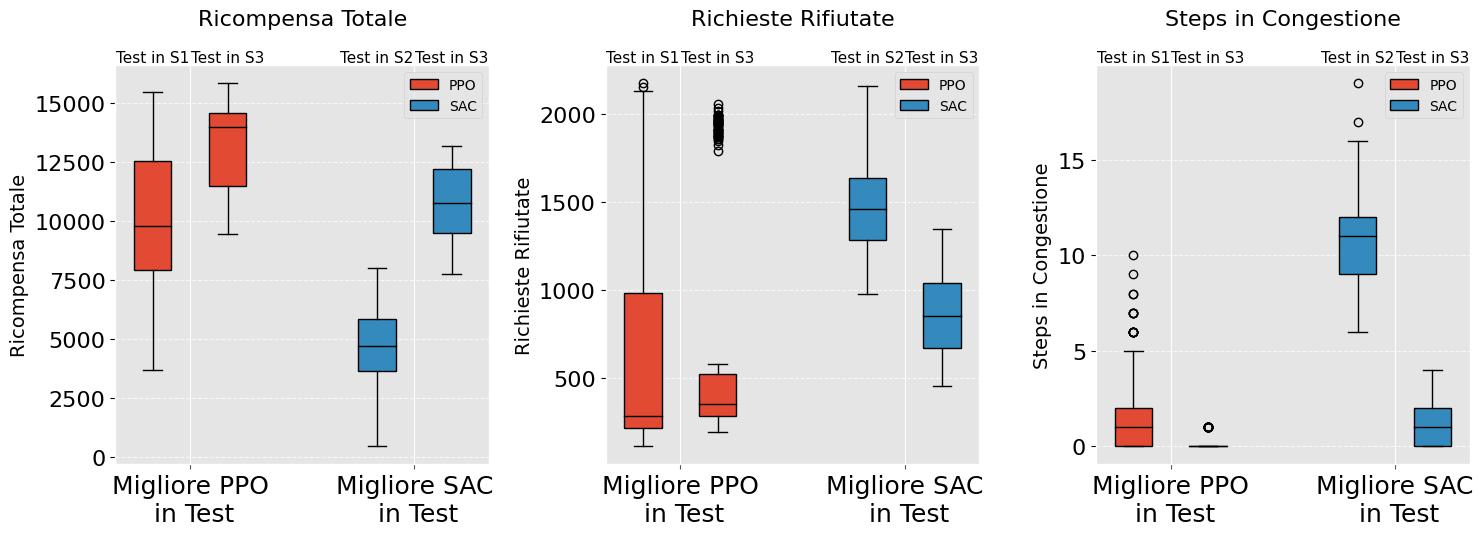

In [104]:
def plot_test_results_boxplot(df1_p_s_s2s1, df2_p_s_s2s3, df3_s_t_s1s2, df4_s_t_s1s3):
    # Modificando l'ordine delle metriche
    metrics = ['Ricompensa Totale', 'Richieste Rifiutate', 'Steps in Congestione']
    data_p_s = [[df1_p_s_s2s1[metric], df2_p_s_s2s3[metric]] for metric in metrics]
    data_s_t = [[df3_s_t_s1s2[metric], df4_s_t_s1s3[metric]] for metric in metrics]

    fig, axs = plt.subplots(1, len(metrics), figsize=(15, 6))
    
    for ax, metric, data_1, data_2 in zip(axs, metrics, data_p_s, data_s_t):
        bp1 = ax.boxplot(data_1, positions=[1, 2], widths=0.5, patch_artist=True, boxprops=dict(facecolor="C0"))
        bp2 = ax.boxplot(data_2, positions=[4, 5], widths=0.5, patch_artist=True, boxprops=dict(facecolor="C1"))
        
        ax.set_title(metric, fontsize=16, y=1.08)  
        ax.set_xticks([1.5, 4.5])
        ax.set_xticklabels(['Migliore PPO\n in Test', 'Migliore SAC\n in Test'], fontsize=18, color='black')
        ax.legend([bp1["boxes"][0], bp2["boxes"][0]], ['PPO', 'SAC'], loc='upper right')
        
        # Modifica l'aspetto del boxplot
        for element in ['whiskers', 'fliers', 'medians', 'caps']:
            plt.setp(bp1[element], color='black')
            plt.setp(bp2[element], color='black')
        
        # Aggiungere grid e labels
        ax.grid(axis='y', linestyle='--', alpha=0.7)
        ax.set_ylabel(metric, fontsize=14, color='black')
        ax.tick_params(axis='y', labelsize=16, colors='black')
        
        # Aggiungi etichette sopra i boxplot
        ax.text(1, 1.02, 'Test in S1', transform=ax.get_xaxis_transform(), ha='center', va='center', fontsize=11, color='black')
        ax.text(2, 1.02, 'Test in S3', transform=ax.get_xaxis_transform(), ha='center', va='center', fontsize=11, color='black')
        ax.text(4, 1.02, 'Test in S2', transform=ax.get_xaxis_transform(), ha='center', va='center', fontsize=11, color='black')
        ax.text(5, 1.02, 'Test in S3', transform=ax.get_xaxis_transform(), ha='center', va='center', fontsize=11, color='black')
        
    #fig.suptitle('Confronto tra PPO e SAC nei diversi scenari di test', fontsize=20, color='black')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

plot_test_results_boxplot(p_s_s2s1, p_s_s2s3, s_t_s1s2, s_t_s1s3)

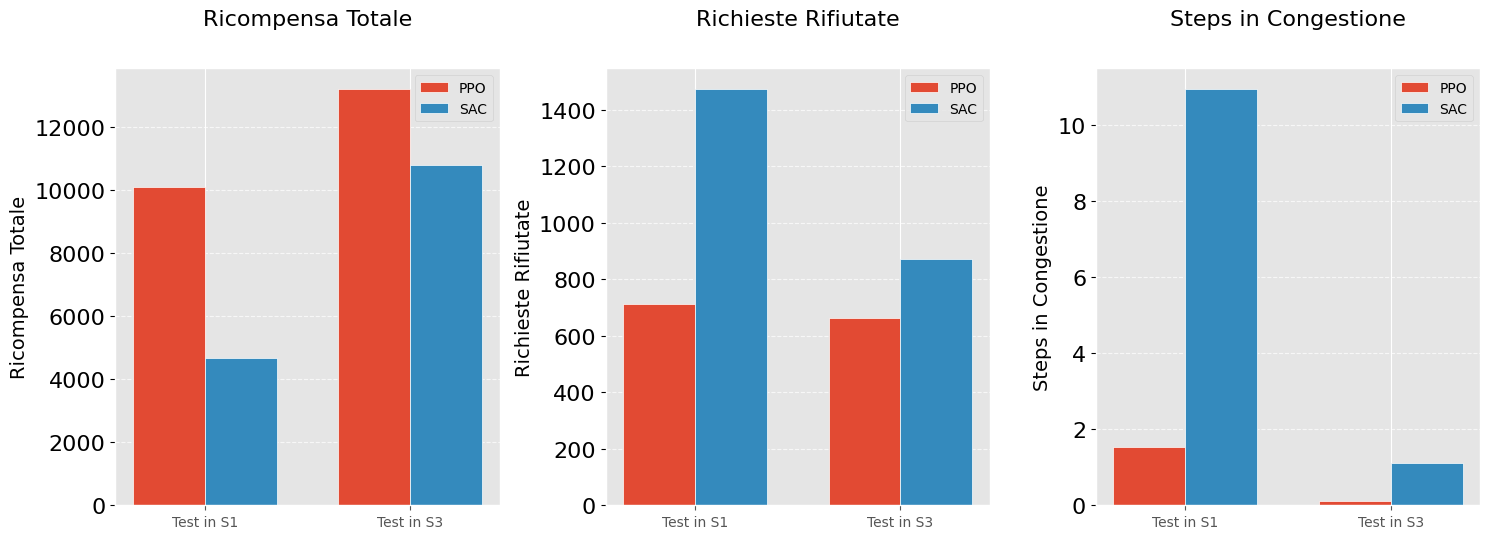

In [105]:
def plot_test_results_mean_comparison(df1_p_s_s2s1, df2_p_s_s2s3, df3_s_t_s1s2, df4_s_t_s1s3):
    metrics = ['Ricompensa Totale', 'Richieste Rifiutate', 'Steps in Congestione']

    # Calcolo delle medie per ogni metrica e per ogni dataframe
    means_p_s = [[np.mean(df1_p_s_s2s1[metric]), np.mean(df2_p_s_s2s3[metric])] for metric in metrics]
    means_s_t = [[np.mean(df3_s_t_s1s2[metric]), np.mean(df4_s_t_s1s3[metric])] for metric in metrics]

    fig, axs = plt.subplots(1, len(metrics), figsize=(15, 6))
    
    # Larghezza delle barre
    bar_width = 0.35
    
    for ax, metric, mean_1, mean_2 in zip(axs, metrics, means_p_s, means_s_t):
        # Creazione barre
        r1 = np.arange(len(mean_1))
        r2 = [x + bar_width for x in r1]
        
        ax.bar(r1, mean_1, width=bar_width, color='C0', edgecolor='white', label='PPO')
        ax.bar(r2, mean_2, width=bar_width, color='C1', edgecolor='white', label='SAC')
        
        ax.set_title(metric, fontsize=16, y=1.08)
        ax.set_xticks([r + bar_width/2 for r in range(len(mean_1))])
        ax.set_xticklabels(['Test in S1', 'Test in S3'])
        ax.legend()
        
        ax.grid(axis='y', linestyle='--', alpha=0.7)
        ax.set_ylabel(metric, fontsize=14, color='black')
        ax.tick_params(axis='y', labelsize=16, colors='black')
        
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


plot_test_results_mean_comparison(p_s_s2s1, p_s_s2s3, s_t_s1s2, s_t_s1s3)

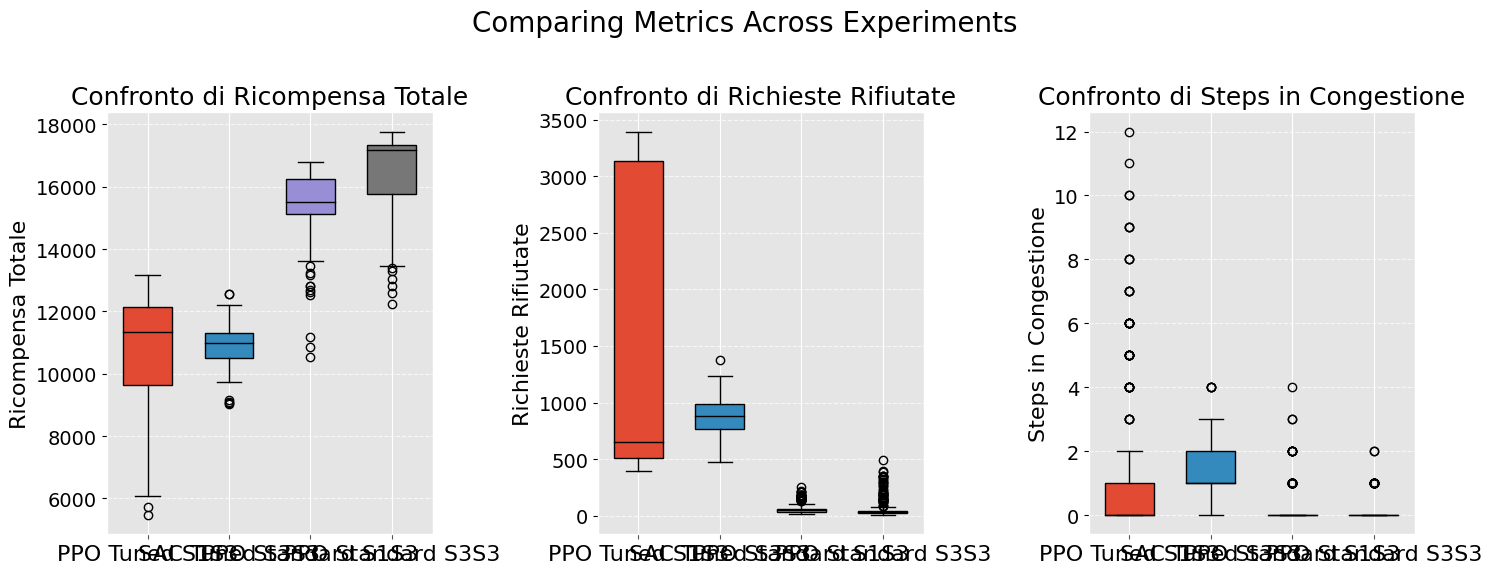

In [106]:
def plot_metrics_comparison(p_t_s1s3, s_t_s3s3, p_s_s1_s3, p_s_s3s3):
    metrics = ['Ricompensa Totale', 'Richieste Rifiutate', 'Steps in Congestione']
    
    data1 = [p_t_s1s3[metric] for metric in metrics]
    data2 = [s_t_s3s3[metric] for metric in metrics]
    data3 = [p_s_s1_s3[metric] for metric in metrics]
    data4 = [p_s_s3s3[metric] for metric in metrics]
    
    fig, axs = plt.subplots(1, len(metrics), figsize=(15, 6))
    
    for ax, metric, data_1, data_2, data_3, data_4 in zip(axs, metrics, data1, data2, data3, data4):
        bp1 = ax.boxplot(data_1, positions=[1], widths=0.6, patch_artist=True, boxprops=dict(facecolor="C0"))
        bp2 = ax.boxplot(data_2, positions=[2], widths=0.6, patch_artist=True, boxprops=dict(facecolor="C1"))
        bp3 = ax.boxplot(data_3, positions=[3], widths=0.6, patch_artist=True, boxprops=dict(facecolor="C2"))
        bp4 = ax.boxplot(data_4, positions=[4], widths=0.6, patch_artist=True, boxprops=dict(facecolor="C3"))

        ax.set_ylabel(metric, fontsize=16, color='black')
        ax.set_title(f'Confronto di {metric}', fontsize=18, color='black')
        ax.set_xticks([1, 2, 3, 4])
        ax.set_xticklabels(['PPO Tuned S1S3', 'SAC Tuned S3S3', 'PPO Standard S1S3', 'PPO Standard S3S3'], fontsize=16, color='black')
        
        for element in ['whiskers', 'fliers', 'medians', 'caps']:
            plt.setp(bp1[element], color='black')
            plt.setp(bp2[element], color='black')
            plt.setp(bp3[element], color='black')
            plt.setp(bp4[element], color='black')
        
        ax.grid(axis='y', linestyle='--', alpha=0.7)
        ax.tick_params(axis='y', labelsize=14, colors='black')
        
    fig.suptitle('Comparing Metrics Across Experiments', fontsize=20, color='black')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

plot_metrics_comparison(p_t_s1s3, s_t_s3s3, p_s_s1s3, p_s_s3s3)

In [108]:
esperimenti = {
    'p_s_s1s1': p_s_s1s1,
    'p_s_s1s2': p_s_s1s2,
    'p_s_s1s3': p_s_s1s3,
    'p_s_s2s1': p_s_s2s1,
    'p_s_s2s2': p_s_s2s2,
    'p_s_s2s3': p_s_s2s3,
    'p_s_s3s1': p_s_s3s1,
    'p_s_s3s2': p_s_s3s2,
    'p_s_s3s3': p_s_s3s3,
    
    'p_t_s1s1': p_t_s1s1,
    'p_t_s1s2': p_t_s1s2,
    'p_t_s1s3': p_t_s1s3,
    'p_t_s2s1': p_t_s2s1,
    'p_t_s2s2': p_t_s2s2,
    'p_t_s2s3': p_t_s2s3,
    'p_t_s3s1': p_t_s3s1,
    'p_t_s3s2': p_t_s3s2,
    'p_t_s3s3': p_t_s3s3,
    
    's_s_s1s1': s_s_s1s1,
    's_s_s1s2': s_s_s1s2,
    's_s_s1s3': s_s_s1s3,
    's_s_s2s1': s_s_s2s1,
    's_s_s2s2': s_s_s2s2,
    's_s_s2s3': s_s_s2s3,
    's_s_s3s1': s_s_s3s1,
    's_s_s3s2': s_s_s3s2,
    's_s_s3s3': s_s_s3s3,
    
    's_t_s1s1': s_t_s1s1,
    's_t_s1s2': s_t_s1s2,
    's_t_s1s3': s_t_s1s3,
    's_t_s2s1': s_t_s2s1,
    's_t_s2s2': s_t_s2s2,
    's_t_s2s3': s_t_s2s3,
    's_t_s3s1': s_t_s3s1,
    's_t_s3s2': s_t_s3s2,
    's_t_s3s3': s_t_s3s3,
    
    'n_s_s1s1': n_s_s1s1,
    'n_s_s1s2': n_s_s1s2,
    'n_s_s1s3': n_s_s1s3,
    'n_s_s2s1': n_s_s2s1,
    'n_s_s2s2': n_s_s2s2,
    'n_s_s2s3': n_s_s2s3,
    'n_s_s3s1': n_s_s3s1,
    'n_s_s3s2': n_s_s3s2,
    'n_s_s3s3': n_s_s3s3,
    
    'n_t_s1s1': n_t_s1s1,
    'n_t_s1s2': n_t_s1s2,
    'n_t_s1s3': n_t_s1s3,
    'n_t_s2s1': n_t_s2s1,
    'n_t_s2s2': n_t_s2s2,
    'n_t_s2s3': n_t_s2s3,
    'n_t_s3s1': n_t_s3s1,
    'n_t_s3s2': n_t_s3s2,
    'n_t_s3s3': n_t_s3s3,
}

In [114]:
# Lista per contenere i DataFrames modificati
dfs = []

# Itera su ogni esperimento e il relativo DataFrame
for nome_esperimento, df in esperimenti.items():
    # Copia il DataFrame per evitare Warning su setting copy
    df_copy = df.copy()
    # Aggiungi una nuova colonna con il nome dell'esperimento
    df_copy['Esperimento'] = nome_esperimento
    # Aggiungi il DataFrame modificato alla lista
    dfs.append(df_copy)

# Concatena tutti i DataFrames nella lista in un unico DataFrame
df_unificato = pd.concat(dfs, ignore_index=True)

# Visualizza il DataFrame unificato
print(df_unificato.head())

   Ricompensa Totale  Richieste Rifiutate  Richieste Gestite  \
0              15390                 34.0             9939.0   
1              11333                 52.0            10007.0   
2              12115                 30.0            10170.0   
3              15220                 35.0             9850.0   
4              15414                 31.0            10058.0   

   Steps in Congestione  Percentuale di Richieste Rifiutate  seed Esperimento  
0                   1.0                                0.34     0    p_s_s1s1  
1                   4.0                                0.52     0    p_s_s1s1  
2                   3.0                                0.29     0    p_s_s1s1  
3                   1.0                                0.36     0    p_s_s1s1  
4                   1.0                                0.31     0    p_s_s1s1  


In [ ]:
df_unificato.to_csv('C:/Users/giaco/Desktop/local-git/esperimenti_unificati.csv', index=False)